## Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV

### Creation of Dataframe:

In [2]:
weather_df = pd.read_csv('weatherAUS.csv')
display(weather_df.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4


## Exploratory Data Analysis (EDA):

In [3]:
print('Dataset contains {} rows & {} features' .format(weather_df.shape[0], weather_df.shape[1]))

Dataset contains 36881 rows & 23 features


### Displaying All Features:

In [4]:
print(weather_df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


### How many different data types do these 23 features contain?

In [5]:
print(pd.value_counts(weather_df.dtypes))

float64    17
object      6
dtype: int64


Both numerical & non-numerical datatypes are present here

### Displaying non-numerical features:

In [6]:
display(weather_df.select_dtypes(exclude="number").head())

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,5/18/2009,Hobart,NW,WSW,SSE,No
1,07-03-2009,Launceston,SSW,E,SW,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No
3,03-04-2010,PerthAirport,SW,SSE,SW,No
4,09-09-2010,GoldCoast,NNW,WNW,N,No


### Changing Datatype of Date column from object to datetime:

In [7]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
print(weather_df.dtypes)

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
dtype: object


In [8]:
year_min = weather_df['Date'].dt.year.min()
year_max = weather_df['Date'].dt.year.max()
print('This dataset contains information from year {} to year {}' .format(year_min, year_max))

This dataset contains information from year 2007 to year 2012


### Checking how many unique values are present in each non-numerical feature:

In [9]:
non_numeric_col = weather_df.select_dtypes(exclude=np.number).columns.tolist()
display(weather_df[non_numeric_col[1:]].describe())
print('\nNon-Numeric columns = \n', non_numeric_col)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,36881,33513,34072,35919,36255
unique,46,16,16,16,2
top,Canberra,SE,N,SE,No
freq,1085,2403,2862,2939,27756



Non-Numeric columns = 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Checking Numerical Features:

In [10]:
numeric_col = weather_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


### Breaking numerical columns into two following parts:

In [11]:
numeric_input_col = numeric_col[:-1] 
target_col = numeric_col[-1]
print('numeric input columns: \n\n', numeric_input_col)
print('\n')
print('Target Column: ', target_col)

numeric input columns: 

 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Target Column:  RISK_MM


### Statistical Description of Numerical Features:

In [12]:
display(weather_df.describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


**<u>Inference</u>**: 
* In Australia, minimum temperature recorded is -8.5 degree centigrade while maximum recorded temperature is 48.1 degree centigrade
* Avg daily rainfall is 2.6 mm
* Avg Sunshine received is 7.54 hr
* The average wind gust speed is 40.39 km/hr
* By looking at min & max value; our assumption is: "Cloud9am" & "Cloud3pm" can be Ordinal Variable
* For Rainfall column; Standard Deviation = 9.1 & Mean = 2.6 <br>
Similarly for RISK_MM column; 
Standard Deviation = 8.9 
Mean = 2.6 <br>
Since **(SD / Mean) > 1**; so Mean values of these 2 columns ('Rainfall' & 'RISK_MM') are not reliable.

### Exploring Cloud9am column:

In [13]:
print(weather_df['Cloud9am'].value_counts())

7.0    5822
1.0    4487
8.0    3113
0.0    2386
6.0    2383
2.0    1747
3.0    1665
5.0    1557
4.0    1220
9.0       1
Name: Cloud9am, dtype: int64


### Exploring Cloud3pm column:

In [14]:
print(weather_df['Cloud3pm'].value_counts())

7.0    5447
1.0    4152
8.0    2754
6.0    2695
5.0    2055
3.0    2005
2.0    1968
4.0    1484
0.0    1339
Name: Cloud3pm, dtype: int64


**<u>Insight</u>**: 
* This clearly indicates Cloud9am & Cloud3pm are actually Ordinal variables; as they are taking finite number of distinct values between (0-9).
* So we have to change datatype of these 2 columns from "float64" to Object type. <br>

**<u>Assumption</u>**: <br>
Say, from domain expert; we have got the actual values of Oktas scale as follows- <br>
0 - Clear <br>
1 - Sunny <br>
2 - Mostly Clear <br>
3 - Scattered clouds <br>
4 - Partly Cloudy <br>
5 - Broken clouds <br>
6 - Cloudy <br>
7 - Mostly Cloudy <br>
8 - Overcast <br>
9 - Sky obscured

### Decoding the numeric codes of Cloud9am column:

In [15]:
weather_df.loc[weather_df['Cloud9am'] == 0, 'Cloud9am'] = 'Clear'
weather_df.loc[weather_df['Cloud9am'] == 1, 'Cloud9am'] = 'Sunny'
weather_df.loc[weather_df['Cloud9am'] == 2, 'Cloud9am'] = 'Mostly Clear'
weather_df.loc[weather_df['Cloud9am'] == 3, 'Cloud9am'] = 'Mostly Sunny'
weather_df.loc[weather_df['Cloud9am'] == 4, 'Cloud9am'] = 'Partly Cloudy'
weather_df.loc[weather_df['Cloud9am'] == 5, 'Cloud9am'] = 'Partly Sunny'
weather_df.loc[weather_df['Cloud9am'] == 6, 'Cloud9am'] = 'Mostly Cloudy'
weather_df.loc[weather_df['Cloud9am'] == 7, 'Cloud9am'] = 'Cloudy'
weather_df.loc[weather_df['Cloud9am'] == 8, 'Cloud9am'] = 'Overcast'
weather_df.loc[weather_df['Cloud9am'] == 9, 'Cloud9am'] = 'Completely Overcast'

In [16]:
print(weather_df['Cloud9am'].value_counts())

Cloudy                 5822
Sunny                  4487
Overcast               3113
Clear                  2386
Mostly Cloudy          2383
Mostly Clear           1747
Mostly Sunny           1665
Partly Sunny           1557
Partly Cloudy          1220
Completely Overcast       1
Name: Cloud9am, dtype: int64


### Decoding the numeric codes of Cloud3pm column:

In [17]:
weather_df.loc[weather_df['Cloud3pm'] == 0, 'Cloud3pm'] = 'Clear'
weather_df.loc[weather_df['Cloud3pm'] == 1, 'Cloud3pm'] = 'Sunny'
weather_df.loc[weather_df['Cloud3pm'] == 2, 'Cloud3pm'] = 'Mostly Clear'
weather_df.loc[weather_df['Cloud3pm'] == 3, 'Cloud3pm'] = 'Mostly Sunny'
weather_df.loc[weather_df['Cloud3pm'] == 4, 'Cloud3pm'] = 'Partly Cloudy'
weather_df.loc[weather_df['Cloud3pm'] == 5, 'Cloud3pm'] = 'Partly Sunny'
weather_df.loc[weather_df['Cloud3pm'] == 6, 'Cloud3pm'] = 'Mostly Cloudy'
weather_df.loc[weather_df['Cloud3pm'] == 7, 'Cloud3pm'] = 'Cloudy'
weather_df.loc[weather_df['Cloud3pm'] == 8, 'Cloud3pm'] = 'Overcast'

In [18]:
print(weather_df['Cloud3pm'].value_counts())

Cloudy           5447
Sunny            4152
Overcast         2754
Mostly Cloudy    2695
Partly Sunny     2055
Mostly Sunny     2005
Mostly Clear     1968
Partly Cloudy    1484
Clear            1339
Name: Cloud3pm, dtype: int64


### After change; checking of datatypes:

In [19]:
print(weather_df.dtypes)

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                 object
Cloud3pm                 object
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
dtype: object


### now numerical & categorical columns are:

In [20]:
non_numeric_cols = weather_df.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = weather_df.select_dtypes(include=np.number).columns.tolist()
numeric_input_cols = numeric_cols[:-1]
print('Numerical Columns are: \n\n', numeric_cols)
print('\n\nCategorical Columns are: \n', non_numeric_cols)

Numerical Columns are: 

 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


Categorical Columns are: 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']


### Looking at Information of Dataset: 

In [21]:
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           36881 non-null  datetime64[ns]
 1   Location       36881 non-null  object        
 2   MinTemp        36543 non-null  float64       
 3   MaxTemp        36639 non-null  float64       
 4   Rainfall       36255 non-null  float64       
 5   Evaporation    24035 non-null  float64       
 6   Sunshine       23317 non-null  float64       
 7   WindGustDir    33513 non-null  object        
 8   WindGustSpeed  33520 non-null  float64       
 9   WindDir9am     34072 non-null  object        
 10  WindDir3pm     35919 non-null  object        
 11  WindSpeed9am   36219 non-null  float64       
 12  WindSpeed3pm   36235 non-null  float64       
 13  Humidity9am    36311 non-null  float64       
 14  Humidity3pm    36370 non-null  float64       
 15  Pressure9am    3330

Apart from 'Date' & 'Location' columns; all remaining 21 features contain some null values    

### Checking if there exists any Null value in dataframe:

In [22]:
series1 = weather_df.isnull().sum(axis=0)
print(series1)

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
dtype: int64


As we can see; there are huge null values are present inside each attribute except 'Date' & 'Location'

### Checking % of Null value :

In [23]:
null_df = pd.DataFrame()
null_df['Features'] = series1.index
null_df['Number of Null Values'] = series1.values
null_df['% of Null Values'] = np.round((series1.values/weather_df.shape[0]) * 100,2)
display(null_df)

,Features,Number of Null Values,% of Null Values
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,338,0.92
3,MaxTemp,242,0.66
4,Rainfall,626,1.70
5,Evaporation,12846,34.83
6,Sunshine,13564,36.78
7,WindGustDir,3368,9.13
8,WindGustSpeed,3361,9.11
9,WindDir9am,2809,7.62


### Selecting those features where % of null values <= 5% :

In [24]:
cond1 = null_df['% of Null Values'] <= 5
cond2 = null_df['% of Null Values'] != 0
null_df1 = null_df[cond1 & cond2].reset_index(drop=True)
display(null_df1)

,Features,Number of Null Values,% of Null Values
0,MinTemp,338,0.92
1,MaxTemp,242,0.66
2,Rainfall,626,1.70
3,WindDir3pm,962,2.61
4,WindSpeed9am,662,1.79
5,WindSpeed3pm,646,1.75
6,Humidity9am,570,1.55
7,Humidity3pm,511,1.39
8,Temp9am,487,1.32
9,Temp3pm,444,1.20


### Before removing null values, lets create a copy of original dataframe:

In [25]:
weather = weather_df.copy()

### Removing null values from those features where % of null values <= 5% 
### (Business Approval required) :

In [26]:
weather.dropna(subset=null_df1['Features'], inplace=True)
print(weather[null_df1['Features'].values].isnull().sum(axis=0))

MinTemp         0
MaxTemp         0
Rainfall        0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
dtype: int64


In [27]:
print('After elimination of missing values; Dataset contains {} rows & {} features' 
      .format(weather.shape[0], weather.shape[1]))

After elimination of missing values; Dataset contains 34695 rows & 23 features


### Remaining columns where we still have missing values:

In [28]:
rem_cols = null_df[null_df['% of Null Values'] > 5]['Features'].tolist()
print('Remaining Columns = \n\n', rem_cols)

Remaining Columns = 

 ['Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']


For these remaining columns, we will do Missing value imputation after Train-Test split; <br> because if we do some imputation on entire data; it may create **Data Leakage** problem

### Checking if there exists any duplicate row in dataframe:

In [29]:
print(weather.duplicated(keep='first').sum())

0


### Visualizing Histograms of Numerical Features:

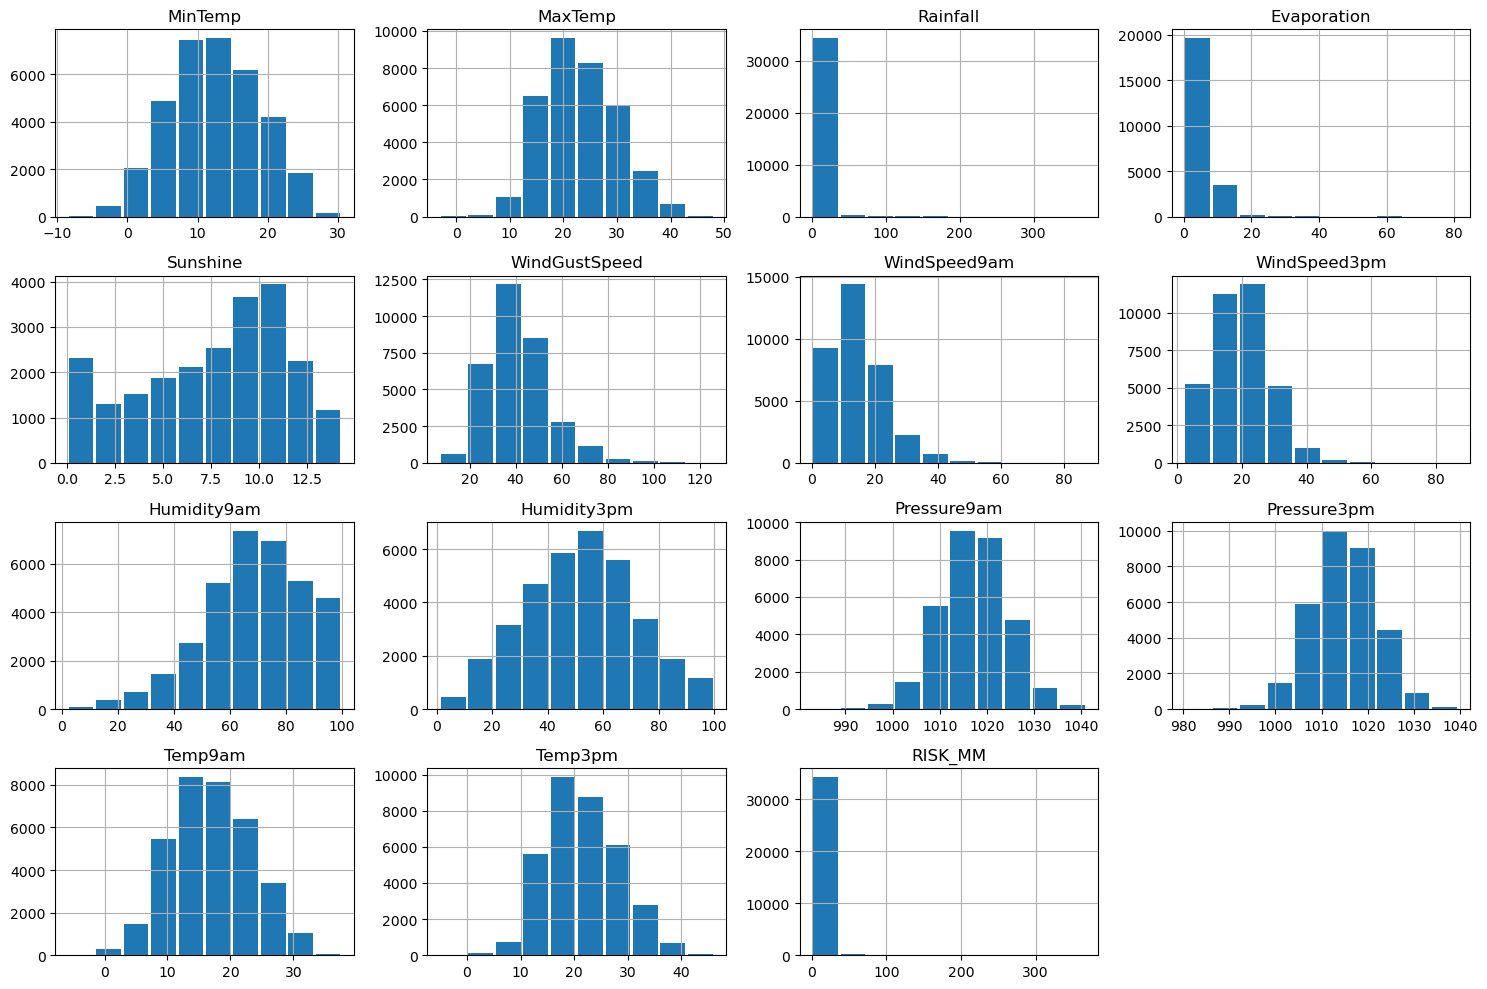

In [30]:
weather[numeric_cols].hist(figsize=(15,10), rwidth=0.9)
plt.tight_layout();

**<u>Inference</u>**: 
* 'MaxTemp', 'Evaporation', WindGustSpeed', 'WindSpeed9am' seem to follow positively skewed Normal Distribution
* 'Humidity9am' is following negatively skewed Normal Distribution
* We will verify all these distributions in a detailed way while doing box plot.

### Visualizing Target Feature w.r.t each Input Numerical Feature:

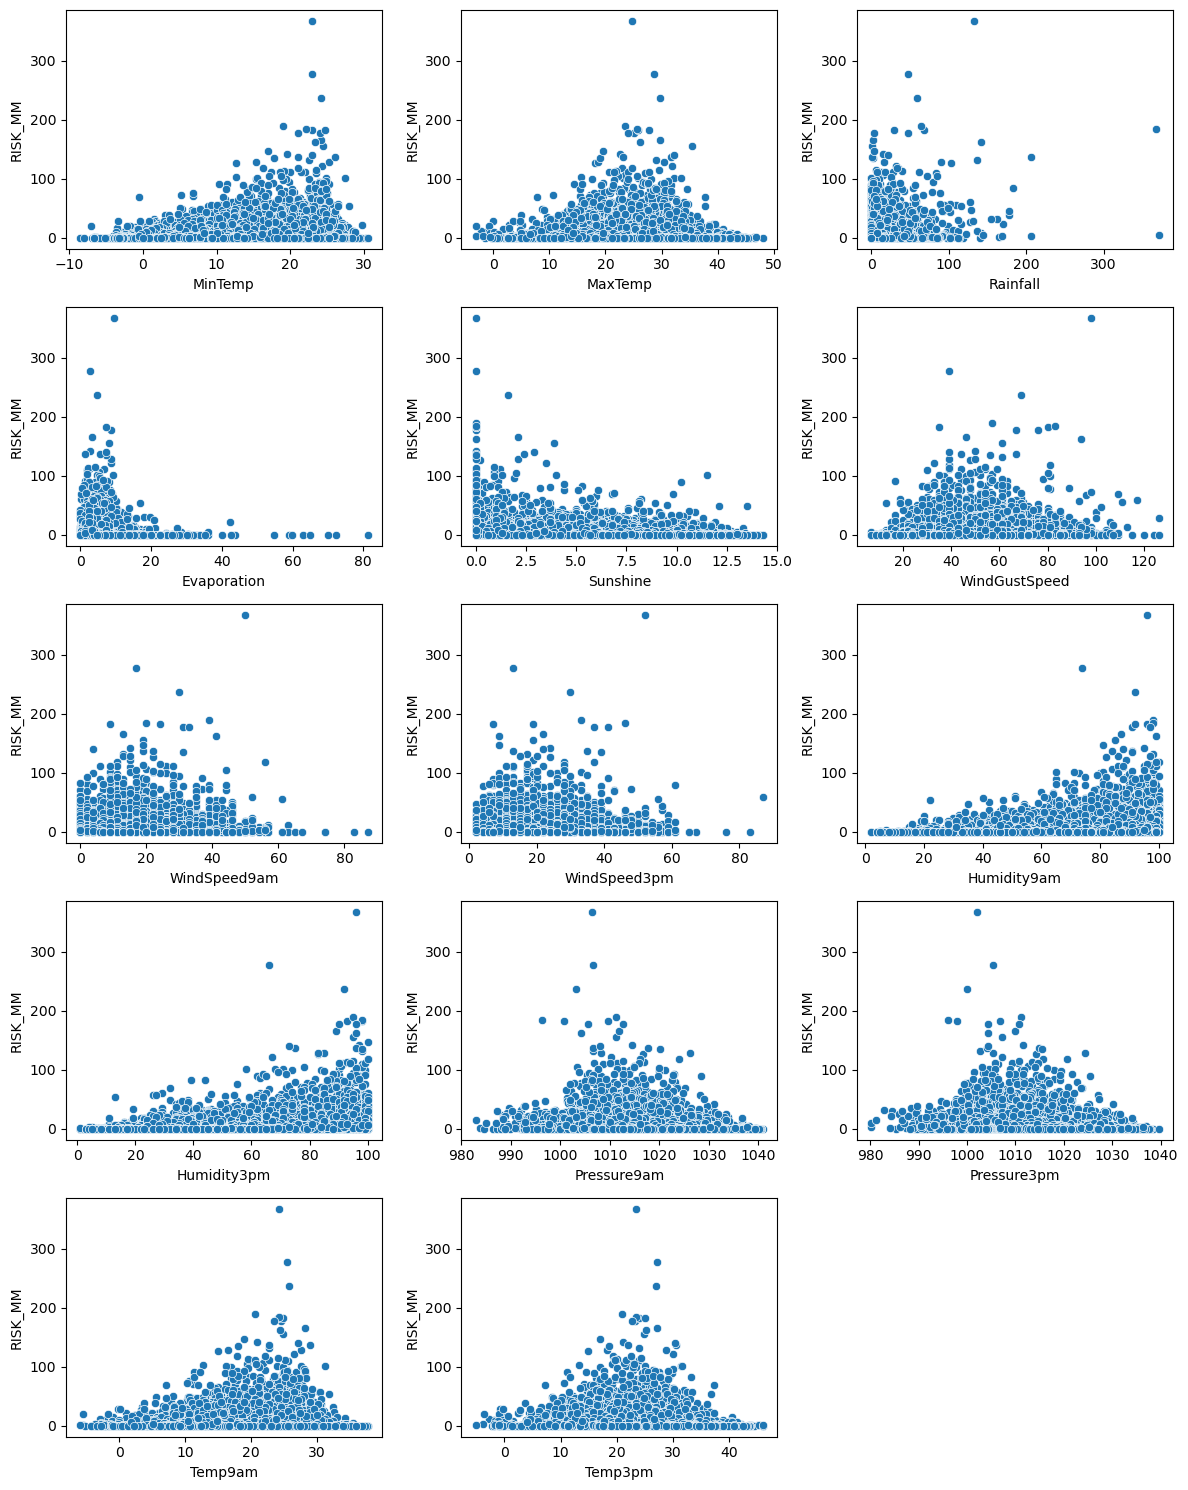

In [31]:
plt.figure(figsize=(12,15))
for i in range(0, len(numeric_input_cols)):
    axi = plt.subplot(5,3,i+1)
    sns.scatterplot(data=weather, x=numeric_input_cols[i], y=target_col, ax=axi)
plt.tight_layout();

**<u>Insights</u>**: 
* It seems there is no strong monotonic increasing linear relationship between numerical input features and target variable.
* some of the above graphs; look similar in nature. <br> for example: "Windspeed9am", "windspeed3pm".
  both of these input features are behaving in a similar way wrt target feature.
* Such situation may give rise to **Multicollinearity problem**. We will decide on it later; after finding the correlation coefficients. 

### An example of strong evidence of Multicollinearity:

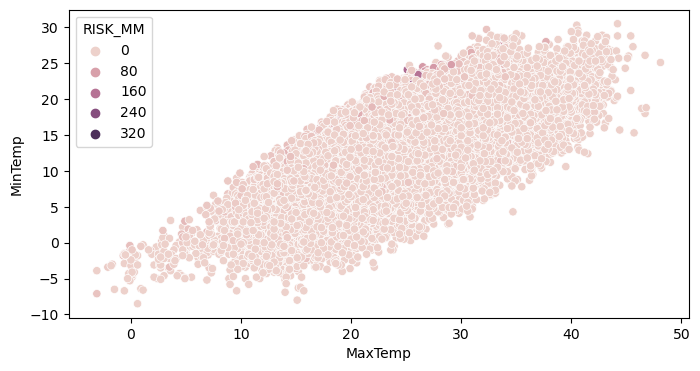

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = weather, x = 'MaxTemp', y = 'MinTemp', hue = 'RISK_MM');

**<u>Insights</u>**:
* here we can see as MaxTemp is increasing; MinTemp is also increasing
* A high rainfall will be occured tomorrow; when MaxTemp is between 10 & 35 and MinTemp between 10 & 25

## Meaningful Information obtained through visualization of Categorical Features-

### Max Temperature vs Location:

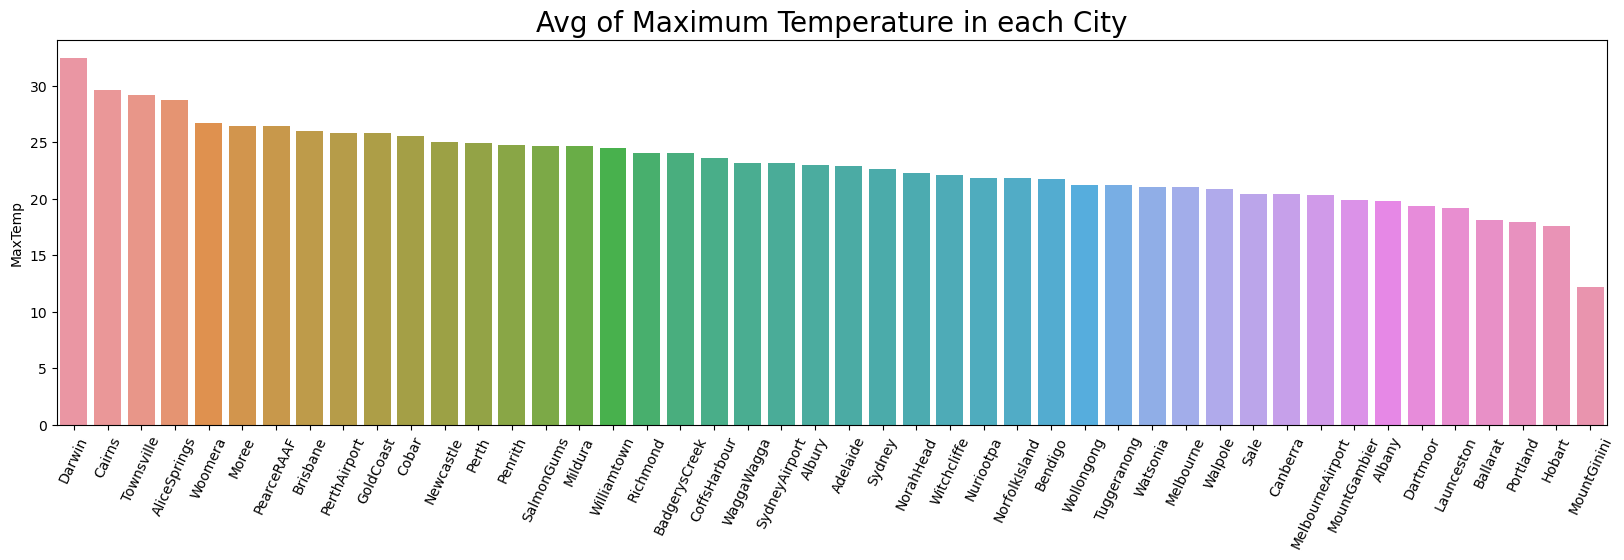

In [33]:
temp_df1 = temp_df2 = 0
temp_df1 = weather[['Location', 'MaxTemp']]
temp_df2 = temp_df1.groupby('Location').agg({'MaxTemp':'mean'}).sort_values('MaxTemp', 
                                                                            ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = temp_df2.index.tolist(), y = temp_df2['MaxTemp'])
plt.xticks(rotation=65)
plt.title('Avg of Maximum Temperature in each City', fontdict={'fontsize':20});

we can see; in **Darwin** maximum avg temp is highest (more than 30 degrees centigrade) <br>
whereas; **MountGinini** is the place where avg max temp is lowest among all cities.

### Average Rainfall by Location:

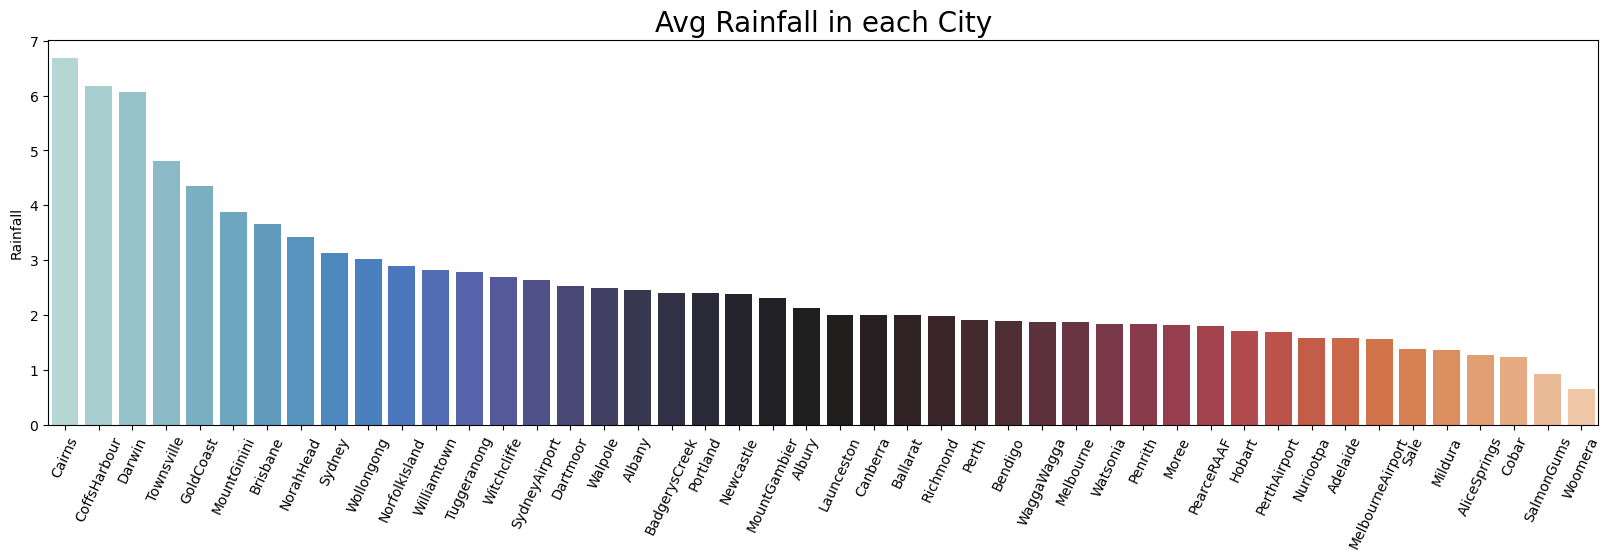

In [34]:
temp_df1 = temp_df2 = 0
temp_df1 = weather[['Location', 'Rainfall']]
temp_df2 = temp_df1.groupby('Location').agg({'Rainfall':'mean'}).sort_values('Rainfall', 
                                                                            ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = temp_df2.index.tolist(), y = temp_df2['Rainfall'], palette='icefire')
plt.xticks(rotation=65)
plt.title('Avg Rainfall in each City', fontdict={'fontsize':20});

**Caims** town received the highest amount of rainfall while **Woomera** experienced least amount of rainfall.

## Feature Extraction from Date column:

In [35]:
weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month_name()
weather['Day'] = weather['Date'].dt.day_name()
display(weather.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,2009-05-18,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,1022.2,Sunny,Sunny,9.1,13.3,No,0.0,2009,May,Monday
1,2009-07-03,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,1002.4,NaN,NaN,1.3,13.7,No,0.0,2009,July,Friday
2,2010-02-18,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,1021.9,Mostly Cloudy,Partly Cloudy,22.7,24.4,No,0.2,2010,February,Thursday
3,2010-03-04,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,1014.9,Mostly Cloudy,Sunny,20.0,26.1,No,0.0,2010,March,Thursday
4,2010-09-09,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,1015.0,NaN,NaN,22.2,22.6,No,0.4,2010,September,Thursday


### Dropping Date Column:

In [36]:
weather.drop('Date', axis=1,inplace=True)
print('Now dataset contains {} rows & {} features' .format(weather.shape[0], weather.shape[1]))

Now dataset contains 34695 rows & 25 features


In [37]:
numeric_cols_mod = weather.select_dtypes(include=np.number).columns.tolist()
non_numeric_cols_mod = weather.select_dtypes(exclude=np.number).columns.tolist()
print('Numerical Columns are: \n\n', numeric_cols_mod)
print('\n\nCategorical Columns are: \n', non_numeric_cols_mod)

Numerical Columns are: 

 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year']


Categorical Columns are: 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Month', 'Day']


### Rainfall by Year:

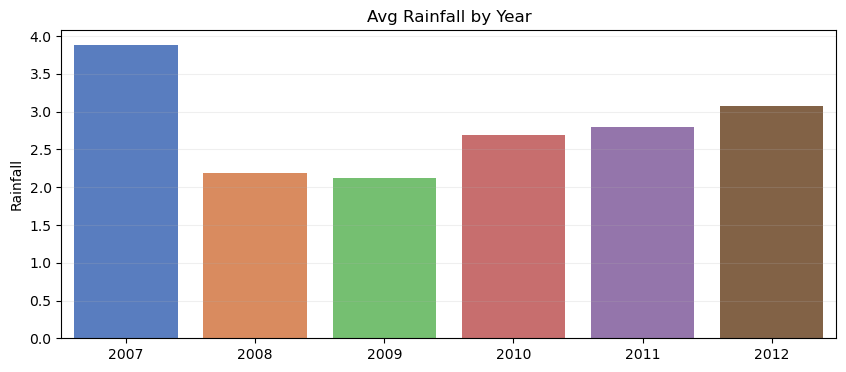

In [38]:
temp_df1 = temp_df2 = 0
temp_df1 = weather[['Year', 'Rainfall']]
temp_df2 = temp_df1.groupby('Year').agg({'Rainfall':'mean'}).sort_values('Rainfall')
plt.figure(figsize=(10,4))
sns.barplot(x = temp_df2.index.tolist(), y = temp_df2['Rainfall'], palette='muted')
plt.title('Avg Rainfall by Year')
plt.grid(axis='y', alpha=0.2);

While the rain fell more in **2007**, **2009** received the least rainfall.

### Temperature by Month:

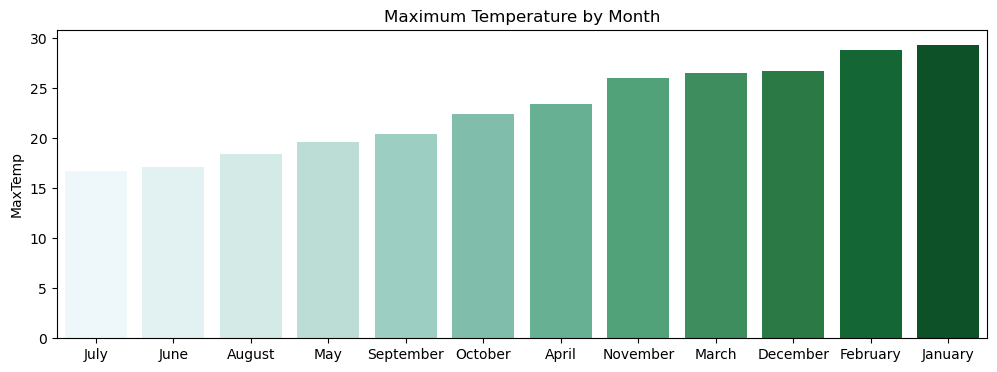

In [39]:
temp_df1 = temp_df2 = 0
temp_df1 = weather[['Month', 'MaxTemp']]
temp_df2 = temp_df1.groupby('Month').agg({'MaxTemp':'mean'}).sort_values('MaxTemp')
plt.figure(figsize=(12,4))
sns.barplot(x = temp_df2.index.tolist(), y = temp_df2['MaxTemp'], palette='BuGn')
plt.title('Maximum Temperature by Month');

Month of **January** experienced maximum temperature & **July** had least max temperature.

### Rainfall by Month:

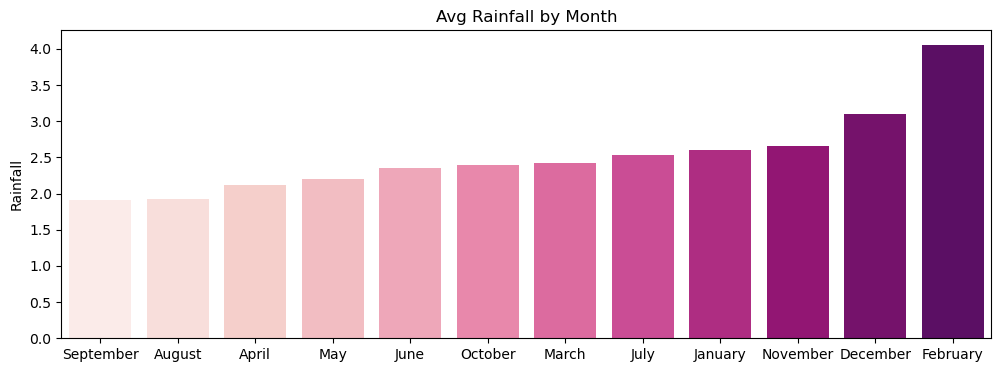

In [40]:
temp_df1 = temp_df2 = 0
temp_df1 = weather[['Month', 'Rainfall']]
temp_df2 = temp_df1.groupby('Month').agg({'Rainfall':'mean'}).sort_values('Rainfall')
plt.figure(figsize=(12,4))
sns.barplot(x = temp_df2.index.tolist(), y = temp_df2['Rainfall'], palette='RdPu')
plt.title('Avg Rainfall by Month');

Month of **February** experienced highest rainfall while **September** had least rainfall.

### Humidity by Location:

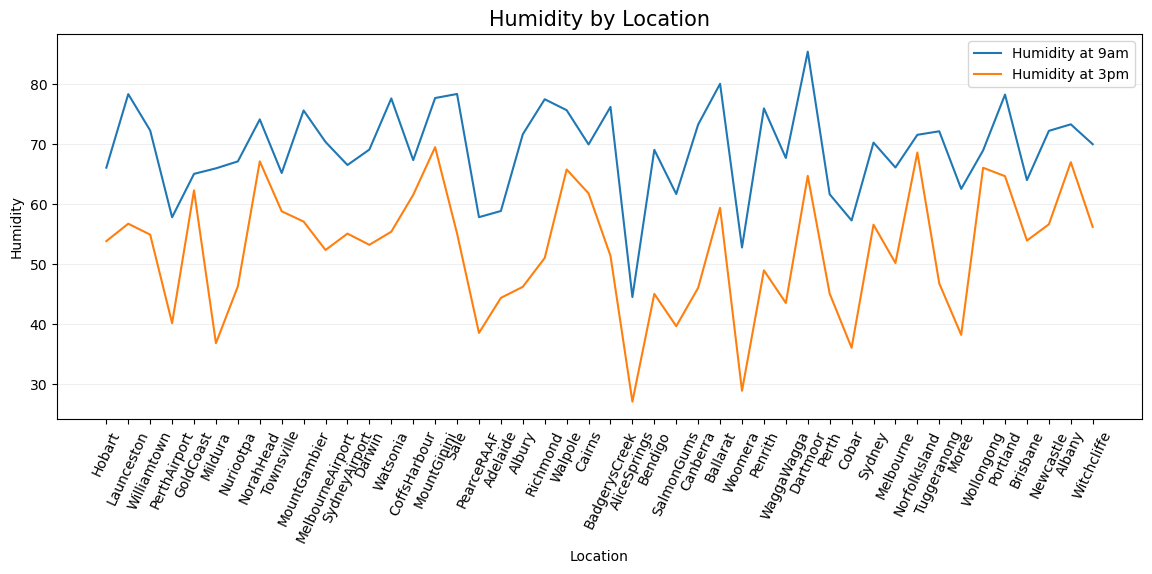

In [41]:
plt.figure(figsize=(14,5))
sns.lineplot(data = weather, x = 'Location', y = 'Humidity9am', errorbar=None)
sns.lineplot(data = weather, x = 'Location', y = 'Humidity3pm', errorbar=None)
plt.xticks(rotation=65)
plt.legend(['Humidity at 9am', 'Humidity at 3pm'])
plt.ylabel('Humidity')
plt.title('Humidity by Location', fontdict={'fontsize':15})
plt.grid(axis='y', alpha=0.2);

**<u>Insights</u>**:
* For Humidity at 9 am, **Dartmoor** had highest humidity & **BadgerysCreek** had lowest humidity.
* For Humidity at 3 pm, **CoffsHarbour** had highest humidity & **BadgerysCreek** had lowest humidity.
* Overall Humidity at 9 am was higher than that of 3 pm

### Windspeed by Location:

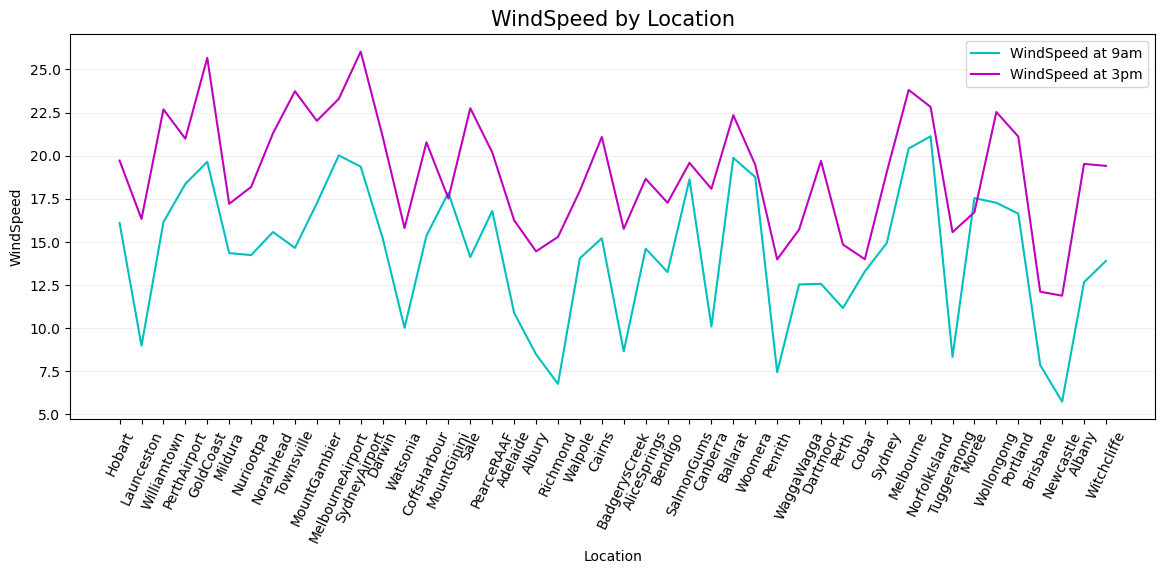

In [42]:
plt.figure(figsize=(14,5))
sns.lineplot(data = weather, x = 'Location', y = 'WindSpeed9am', errorbar=None,c='c')
sns.lineplot(data = weather, x = 'Location', y = 'WindSpeed3pm', errorbar=None, c='m')
plt.xticks(rotation=65)
plt.legend(['WindSpeed at 9am', 'WindSpeed at 3pm'])
plt.ylabel('WindSpeed')
plt.title('WindSpeed by Location', fontdict={'fontsize':15})
plt.grid(axis='y', alpha=0.2);

**<u>Insights</u>**:
* For WindSpeed at 9am, **Melbourne** has highest windSpeed & **Newcastle** has lowest windSpeed
* For WindSpeed at 3pm, **MelbourneAirport** has highest windSpeed & **Brisbane** has least windSpeed
* Overall windSpeed at 3pm was higher than that of 9am

### Pressure by Location:

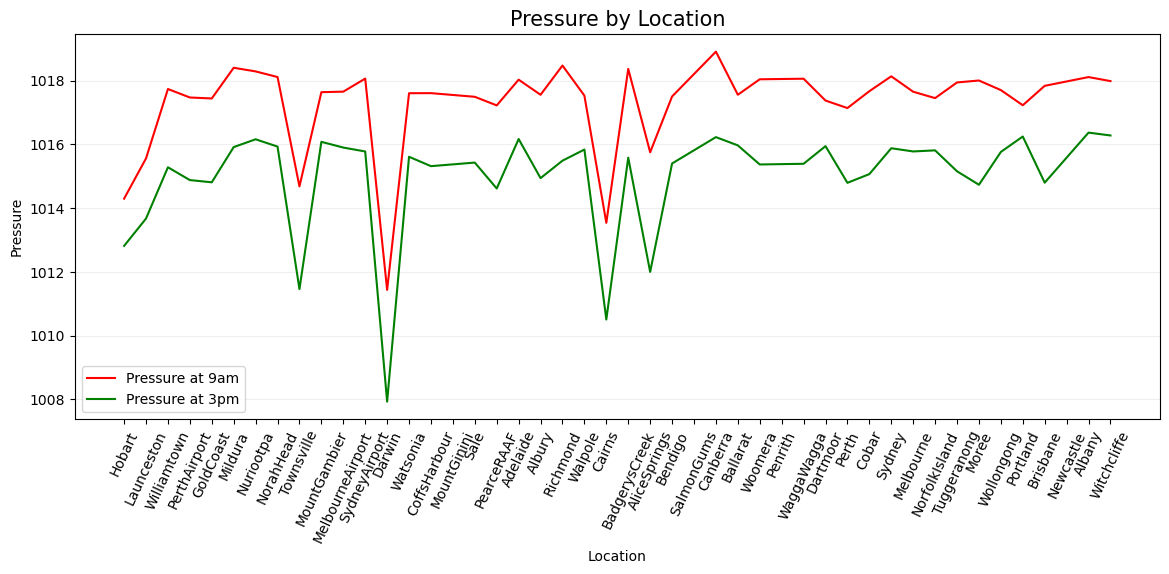

In [43]:
plt.figure(figsize=(14,5))
sns.lineplot(data = weather, x = 'Location', y = 'Pressure9am', errorbar=None, c='red')
sns.lineplot(data = weather, x = 'Location', y = 'Pressure3pm', errorbar=None, c='green')
plt.xticks(rotation=65)
plt.legend(['Pressure at 9am', 'Pressure at 3pm'])
plt.ylabel('Pressure')
plt.title('Pressure by Location', fontdict={'fontsize':15})
plt.grid(axis='y', alpha=0.2);

**<u>Insights</u>**:
* For Pressure at 9 am, **Canberra** pressure was recorded as highest pressure & **Darwin** pressure was recored as lowest pressure.
* For Pressure at 3 pm, **Adelaide** pressure was recorded as highest pressure & **Darwin** pressure was recored as lowest pressure.
* Overall pressure at 9 am was higher than pressure at 3 pm

### Visualization of Wind Direction:

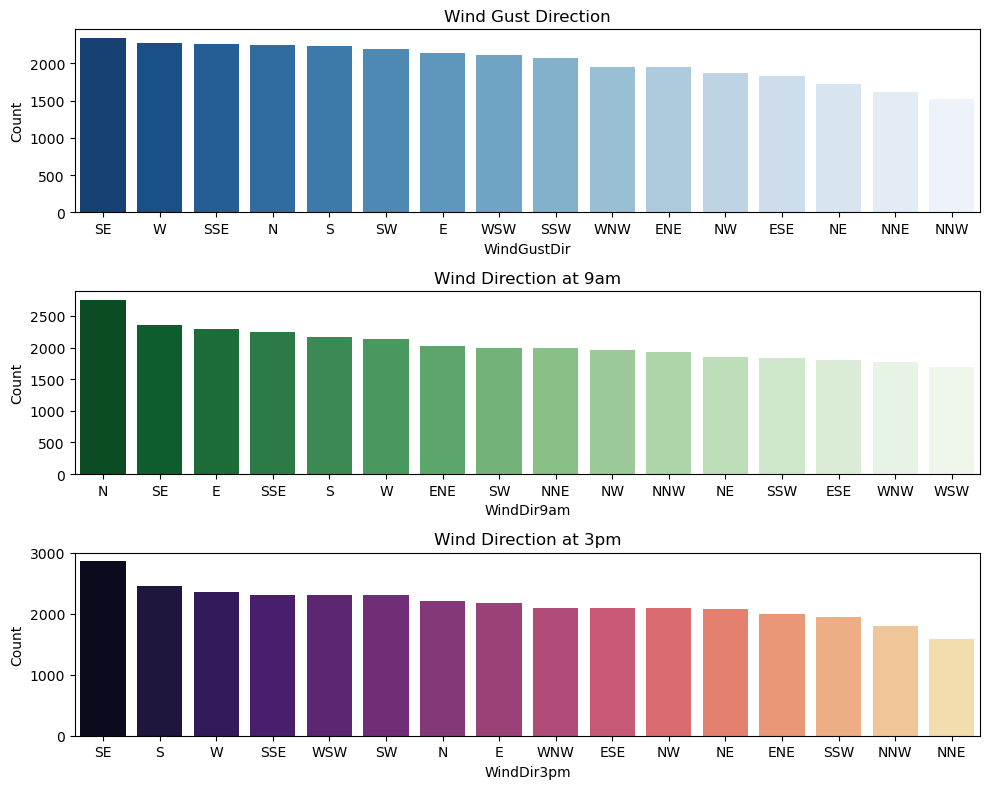

In [44]:
fig, ax = plt.subplots(3,1,figsize=(10,8))

sns.barplot(x=weather['WindGustDir'].value_counts().index,
            y=weather['WindGustDir'].value_counts().values, 
            palette='Blues_r', ax=ax[0])
ax[0].set_xlabel('WindGustDir')
ax[0].set_ylabel('Count')
ax[0].set_title('Wind Gust Direction')

sns.barplot(x=weather['WindDir9am'].value_counts().index,
            y=weather['WindDir9am'].value_counts().values, 
            palette='Greens_r', ax=ax[1])
ax[1].set_xlabel('WindDir9am')
ax[1].set_ylabel('Count')
ax[1].set_title('Wind Direction at 9am')

sns.barplot(x=weather['WindDir3pm'].value_counts().index,
            y=weather['WindDir3pm'].value_counts().values, 
            palette='magma', ax=ax[2])
ax[2].set_xlabel('WindDir3pm')
ax[2].set_ylabel('Count')
ax[2].set_title('Wind Direction at 3pm')
plt.tight_layout();

**<u>Insights</u>**:
* Wind Gust Direction for maximum records is **South East**
* Wind Direction at 9am for maximum records is **North** followed by South East & East
* Wind Direction at 3pm for maximum records is **South East**.

### Wind Direction vs Today Rainfall:

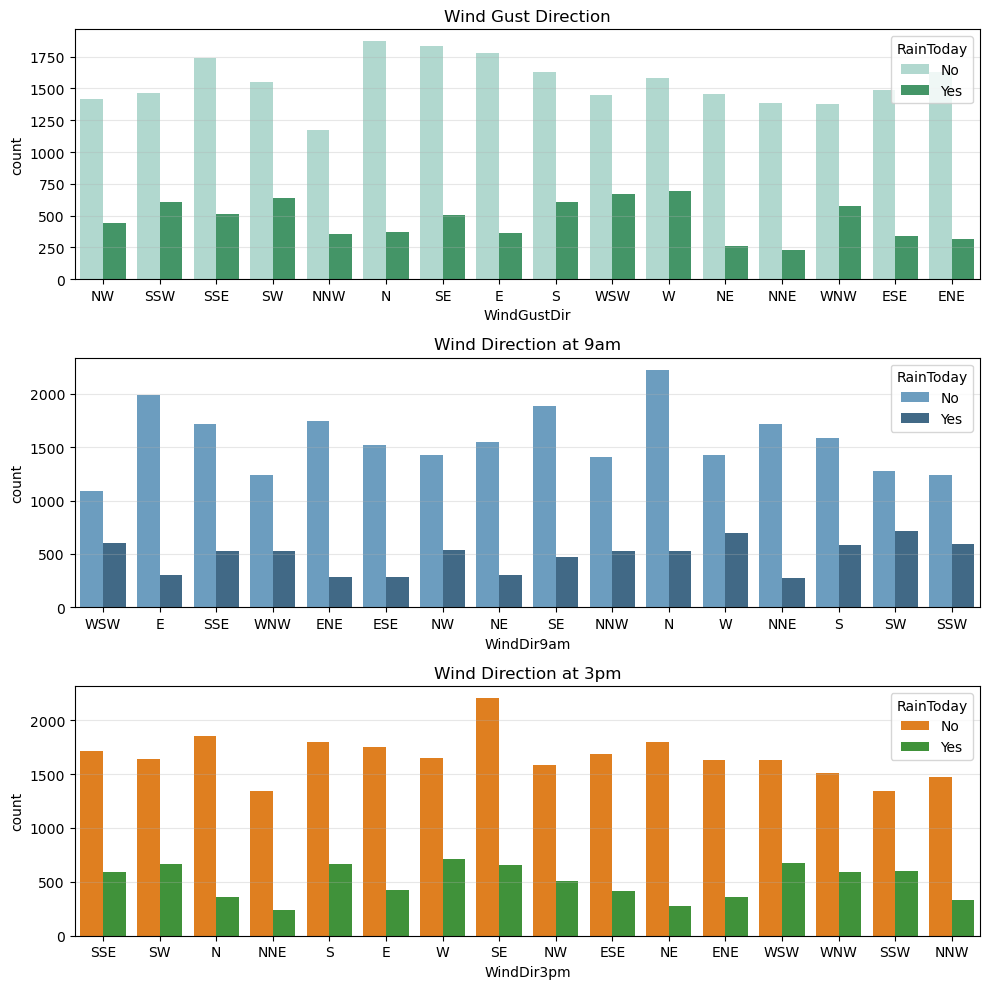

In [45]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.countplot(data=weather, x='WindGustDir', hue='RainToday', ax = ax[0], palette='BuGn')
sns.countplot(data=weather, x='WindDir9am', hue='RainToday', ax = ax[1], palette='Blues_d')
sns.countplot(data=weather, x='WindDir3pm', hue='RainToday', ax = ax[2], palette='Paired_r')

ax[0].grid(axis='y', alpha=0.3)
ax[0].set_title('Wind Gust Direction')
ax[1].grid(axis='y', alpha=0.3)
ax[1].set_title('Wind Direction at 9am')
ax[2].grid(axis='y', alpha=0.3)
ax[2].set_title('Wind Direction at 3pm')
plt.tight_layout();

Probability of raining today is more if wind gust direction, wind direction at 9AM & 3PM are less than 1000

## Correlation Matrix for Numerical Features (without using Heatmap):

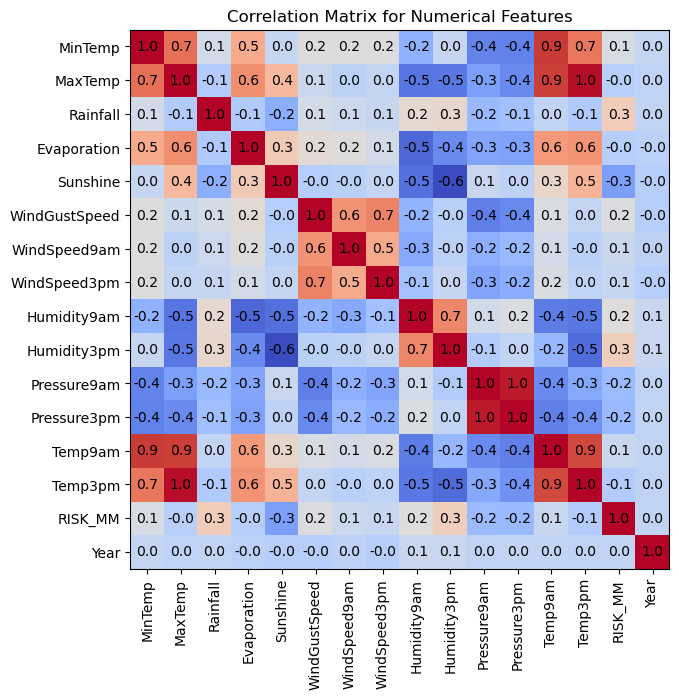

In [46]:
rough_df = pd.DataFrame()
rough_df = weather[numeric_cols_mod]

corr_mat = rough_df.corr()
plt.figure(figsize=(15,7))
plt.imshow(corr_mat, cmap='coolwarm')
matrix = corr_mat.values
for j in range(0, matrix.shape[0]):
    for k in range(0, matrix.shape[1]):
        plt.text(k, j, np.round(matrix[j][k],1), ha = 'center', va = 'center')
        plt.xticks(ticks=range(0,len(matrix)), labels = corr_mat.columns, rotation = 90)
        plt.yticks(ticks=range(0,len(matrix)), labels = corr_mat.columns)
plt.title('Correlation Matrix for Numerical Features');

**<u>Insights</u>**:<br>
* MinTemp has high correlation with MaxTemp (0.7)
* MinTemp has high correlation with Temp9am (0.9)
* MinTemp has high correlation with Temp3pm (0.7)
* MaxTemp has high correlation with Temp9am (0.9)
* MaxTemp has high correlation with Temp3pm (1.0)
* WindGustSpeed has high correlation with WindSpeed3pm (0.7)
* Humidity9am has high correlation with Humidity3pm (0.7)
* Pressure9am has high correlation with Pressure3pm (1.0)
* Temp9am has high correlation with Temp3pm (0.9)
<br><br>
* To be sure about these correlation coeffiecients are really high or not; we have to do Hypothesis testing. But here, instead of that we will be assuming coefficients >= 0.7 as significantly high.

**<u>Decision based on the above highly correlated numeric fields</u>**: <br>
**Assumption:** <br>we are assuming correlation coefficient >= 0.7 as a high correlation coefficient
* Among MinTemp & MaxTemp; MinTemp has high correlation with RISK_MM compared to MaxTemp. So we can remove MaxTemp column
* Among Temp9am & Temp3pm; Temp9am has high correlation with RISK_MM compared to Temp3pm. So we can remove Temp3pm column
* Among Humidity9am & Humidity3pm; Humidity3pm has high correlation with RISK_MM compared to Humidity9am. So we can remove Humidity9am column 
* Among WindGustSpeed & WindSpeed3pm; WindGustSpeed has high correlation with RISK_MM compared to WindSpeed3pm. So we can remove WindSpeed3pm
* We will also drop 'Year' & 'Evaporation' columns as they have no correlation with Target Variable ('RISK_MM')
* Among Pressure9am & Pressure3pm; both features are having same correlation with RISK_MM. Difficult to take decision; which column should be drop? <br>
so we will choose that attribute which is having high variance

### Selection of only 1 feature between 'Pressure9am' & 'Pressure3pm' (based on high variance):

Standard Deviation of Pressure9am =  7.161
Standard Deviation of Pressure3pm =  7.062


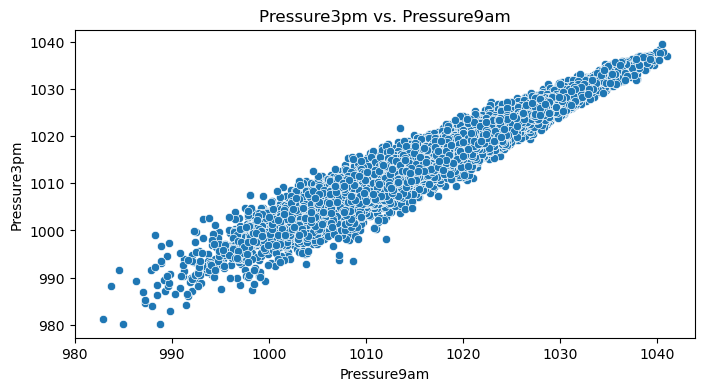

In [47]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=weather, x='Pressure9am', y='Pressure3pm')
std_p9am = np.std(weather['Pressure9am'])
std_p3pm = np.std(weather['Pressure3pm'])
print('Standard Deviation of Pressure9am = ', np.round(std_p9am,3))
print('Standard Deviation of Pressure3pm = ', np.round(std_p3pm,3))
plt.title('Pressure3pm vs. Pressure9am');

Now based on high variance, we will keep "Pressure9am" & we will drop "Pressure3pm" column. <br>
as variance of Pressure9am is larger than variance of pressure3pm.

### Correlation Matrix for Categorical Features using Chi2 Test : 

#### Performing Chi2 test to check correlation between two Categorical Features: 
**H0:** There is no relation between row & features. <br>
**Ha:** There is a relationship between row & column features. <br>
p-value < 0.05 (95% confidence level) means there is a relationship between two catg features

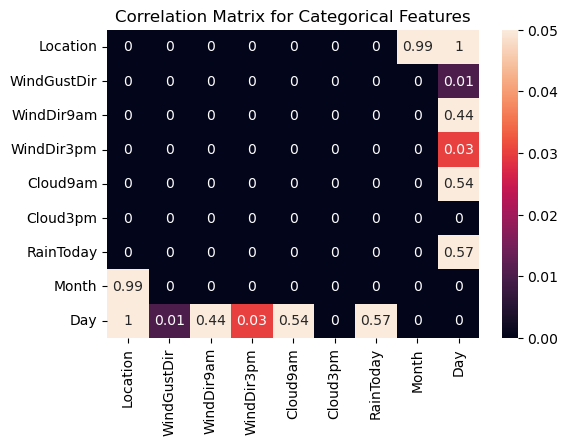

In [48]:
a = temp_df = 0
a = np.zeros(shape=(len(non_numeric_cols_mod),len(non_numeric_cols_mod)))

for i in range(0,len(non_numeric_cols_mod)):
    for j in range(0,len(non_numeric_cols_mod)):
        temp_df = pd.DataFrame()
        temp_df = weather.groupby(non_numeric_cols_mod[i])[non_numeric_cols_mod[j]].value_counts().unstack()
        temp_df.fillna(0, inplace=True)
        a[i,j] = stats.chi2_contingency(observed=temp_df)[1]

plt.figure(figsize=(6,4))
sns.heatmap(np.round(a,2), annot=True, vmin=0, vmax=0.05)
ax = plt.gca()
ax.set_xticklabels(non_numeric_cols_mod, rotation=90)
ax.set_yticklabels(non_numeric_cols_mod, rotation = 0)
ax.set_title('Correlation Matrix for Categorical Features');

Here each cell values represent the p-value <br>
among Cloud9am & Cloud3pm; cloud9am contains more varities of sky condition, compared to Cloud3pm <br>
so, we will be removing "Cloud3pm", "Day", "Location", "Month", "WindDir9am" & "WindDir3pm" column from intution

### Dropping Features to avoid Multicollinearity:

In [49]:
numeric_features_to_be_dropped = ['MaxTemp', 'Temp3pm', 'Humidity9am', 'WindSpeed3pm', 'Year', 
                                  'Evaporation', 'Pressure3pm']
catg_features_to_be_dropped = ['Day', 'Cloud3pm', 'Location', 'WindDir9am', 'Month', 'WindDir3pm']
features_to_be_dropped = numeric_features_to_be_dropped + catg_features_to_be_dropped
weather.drop(features_to_be_dropped, axis=1, inplace=True)
print('Now dataset contains {} rows & {} features' .format(weather.shape[0], weather.shape[1]))

Now dataset contains 34695 rows & 12 features


### Finally our Numerical & Categorical columns are:

In [50]:
numeric_cols_final = weather.select_dtypes(include=np.number).columns.tolist()
non_numeric_cols_final = weather.select_dtypes(exclude=np.number).columns.tolist()
print('Numerical Columns are: \n\n', numeric_cols_final)
print('\n\nCategorical Columns are: \n', non_numeric_cols_final)

Numerical Columns are: 

 ['MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Pressure9am', 'Temp9am', 'RISK_MM']


Categorical Columns are: 
 ['WindGustDir', 'Cloud9am', 'RainToday']


### Seperating Input features & Target variable:

In [51]:
y = weather['RISK_MM']
x = weather.drop(['RISK_MM'], axis=1)

In [52]:
x.head()

,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,Cloud9am,Temp9am,RainToday
0,5.1,0.0,8.9,NW,30.0,7.0,47.0,1023.1,Sunny,9.1,No
1,1.1,0.4,NaN,SSW,50.0,7.0,46.0,1001.5,NaN,1.3,No
2,19.7,0.0,7.2,SSE,41.0,19.0,50.0,1020.9,Mostly Cloudy,22.7,No
3,16.6,0.0,11.3,SW,54.0,28.0,41.0,1018.3,Mostly Cloudy,20.0,No
4,14.6,0.0,NaN,NNW,43.0,6.0,67.0,1020.3,NaN,22.2,No


In [53]:
print(x.shape)

(34695, 11)


In [54]:
y.head()

0    0.0
1    0.0
2    0.2
3    0.0
4    0.4
Name: RISK_MM, dtype: float64

In [55]:
print(y.shape)

(34695,)


### Train-Test Split:

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

In [57]:
x_train

,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,Cloud9am,Temp9am,RainToday
5050,11.5,0.0,3.1,SE,26.0,6.0,61.0,1022.2,NaN,12.8,No
29113,9.2,0.0,NaN,SW,41.0,19.0,32.0,1016.7,NaN,13.0,No
30075,16.5,2.2,0.3,WSW,24.0,15.0,67.0,1018.2,Cloudy,17.9,Yes
28747,8.6,0.2,5.3,WSW,67.0,13.0,52.0,1021.9,Cloudy,9.8,No
33141,21.3,0.0,10.2,E,43.0,26.0,29.0,1013.0,Cloudy,25.3,No
...,...,...,...,...,...,...,...,...,...,...,...
34433,21.4,0.0,8.9,E,37.0,28.0,76.0,1014.6,Mostly Clear,24.0,No
18089,7.7,0.0,5.5,NNE,26.0,17.0,49.0,1024.3,Overcast,9.6,No
25440,22.9,18.4,3.7,S,37.0,15.0,63.0,1011.7,Cloudy,27.4,Yes
36237,10.3,3.4,5.7,WSW,43.0,20.0,92.0,1019.1,Overcast,12.5,Yes


In [58]:
y_train

5050      0.0
29113     0.0
30075     0.0
28747     1.2
33141     0.0
         ... 
34433     0.0
18089     0.0
25440    21.0
36237     1.2
29181     0.0
Name: RISK_MM, Length: 24286, dtype: float64

In [59]:
x_test

,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,Cloud9am,Temp9am,RainToday
10180,10.5,0.0,12.1,WSW,54.0,20.0,58.0,1015.8,Mostly Clear,16.7,No
27386,4.2,0.0,NaN,WSW,43.0,4.0,31.0,NaN,NaN,13.0,No
17728,3.2,0.2,10.3,S,19.0,0.0,45.0,1022.4,Sunny,9.0,No
12673,18.5,5.8,NaN,ENE,30.0,7.0,73.0,1011.0,NaN,21.8,Yes
33284,6.8,0.0,NaN,NE,31.0,11.0,52.0,1021.9,Partly Cloudy,11.8,No
...,...,...,...,...,...,...,...,...,...,...,...
588,5.7,1.8,4.0,WNW,61.0,13.0,63.0,1010.8,Partly Sunny,11.2,Yes
33090,6.3,0.0,10.2,WSW,39.0,9.0,33.0,1024.2,Sunny,12.7,No
34008,17.7,0.8,NaN,N,43.0,2.0,97.0,1014.5,NaN,23.4,No
9576,6.2,0.0,7.3,ESE,28.0,11.0,42.0,1025.3,Mostly Cloudy,10.6,No


In [60]:
y_test

10180     0.0
27386     0.0
17728     0.0
12673     2.8
33284     0.0
         ... 
588       9.0
33090     0.0
34008    28.4
9576      0.0
17640     0.0
Name: RISK_MM, Length: 10409, dtype: float64

## Pre-processing on Train Dataset:

### Handling Missing Values:

In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24286 entries, 5050 to 29181
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        24286 non-null  float64
 1   Rainfall       24286 non-null  float64
 2   Sunshine       15847 non-null  float64
 3   WindGustDir    22627 non-null  object 
 4   WindGustSpeed  22631 non-null  float64
 5   WindSpeed9am   24286 non-null  float64
 6   Humidity3pm    24286 non-null  float64
 7   Pressure9am    22481 non-null  float64
 8   Cloud9am       16549 non-null  object 
 9   Temp9am        24286 non-null  float64
 10  RainToday      24286 non-null  object 
dtypes: float64(8), object(3)
memory usage: 2.2+ MB


### Imputing Numeric Columns of X_train by Median Values:
**(since we have not handled outliers yet & mean is affected by outliers; so lets impute NaN by median)**

In [62]:
rem_cols_numeric = ['Sunshine', 'WindGustSpeed', 'Pressure9am']
x_train[rem_cols_numeric] = x_train[rem_cols_numeric].fillna(x_train[rem_cols_numeric].median())

### Imputing Categorical Columns of X_train by Mode Values:

In [63]:
rem_cols_category = ['WindGustDir', 'Cloud9am']
x_train_mode = x_train[rem_cols_category].mode().iloc[0]
x_train[rem_cols_category] = \
x_train[rem_cols_category].fillna(x_train_mode)

### Finally we have handled all NaN values in X_train:

In [64]:
x_train.isna().sum(axis=0)

MinTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindSpeed9am     0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Temp9am          0
RainToday        0
dtype: int64

### Checking Null values in Y_train:

In [65]:
y_train.isna().sum(axis=0)

0

## User Defined Function for Outlier Treatment:
<u> for outlier treatment; our **assumption** is: </u>
* Here user can either remove all outliers ("Y") or they can adjust them to nearest whisker ("N")
* It is expected to press "N" in each case, to adjust outliers to nearest whisker rather than completely removing them.
* Otherwise we will lose huge amount of data; as a result model performance will suffer a lot.

In [66]:
def outlier_treatment(dataframe, column_name):
    
    count1 = count2 = total_count = axis1 = axis2 = Q1 = Q3 = IQR = 0
    low_limit = upper_limit = percent = 0
    choice = ''
    
    plt.figure(figsize=(8,3))
    axis1 = plt.subplot(1,2,1)
    sns.boxplot(data = dataframe, x = column_name, ax = axis1)
    plt.title('Box Plot for %s' %(column_name))
    axis2 = plt.subplot(1,2,2)
    sns.histplot(data = dataframe, x = column_name, kde = True, ax = axis2,
                 color ='navy', line_kws = {'lw':3, 'ls':'-'})
    plt.title('Histogram Plot for %s' %(column_name))
    plt.tight_layout();

    Q1 = dataframe[column_name].quantile([0.25,0.75]).values[0]
    Q2 = np.percentile(dataframe[column_name], 50)
    Q3 = dataframe[column_name].quantile([0.25,0.75]).values[1]
    IQR = Q3 - Q1
    low_limit   = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    count1 = sum(dataframe[column_name] < low_limit)
    count2 = sum(dataframe[column_name] > upper_limit)
    total_count = count1 + count2
    print('Q1                                                = ', np.round(Q1,2))
    print('Q2                                                = ', np.round(Q2,2))
    print('Q3                                                = ', np.round(Q3,2))
    print('IQR                                               = ', np.round(IQR,2))
    if count1 > 0:
        print('Lower Limit Value                                 = ', np.round(low_limit,2))
        print('Total number of outliers(<Q1-1.5*IQR) for {}      = {}'
              .format(column_name, count1))
    if count2 > 0:
        print('Upper Limit Value                                 = ', np.round(upper_limit,2))
        print('Total number of outliers(>Q3+1.5*IQR) for {}      = {}'
              .format(column_name, count2))
    percent = np.round((total_count/(dataframe[column_name].shape[0]))*100,2)
    if total_count > 0:
        print('Percentage of Outliers                            = {}%'.format(percent))
        choice = input('Do you want to remove all outliers for {} column? \
               \n(press y to confirm / else press n to adjust all outliers to upper or lower limit): '
                       .format(column_name.upper()))
        while (choice.lower() != 'y') and (choice.lower() != 'n'):
            print('invalid choice..please try again')
            choice = input('Do you want to remove all outliers for {} column (y/n)?' 
                           .format(column_name.upper()))
        if choice.lower() == 'y':
            dataframe.loc[(dataframe[column_name] < low_limit), column_name] = np.nan
            dataframe.loc[(dataframe[column_name] > upper_limit), column_name] = np.nan
            dataframe.dropna(axis=0, inplace = True)
        elif choice.lower() == 'n':
            if count1 > 0:
                dataframe.loc[(dataframe[column_name]<low_limit),column_name] = low_limit
            if count2 > 0:
                dataframe.loc[(dataframe[column_name]>upper_limit),column_name] = upper_limit

        plt.figure(figsize=(8,3))
        axis1 = plt.subplot(1,2,1)
        sns.boxplot(data = dataframe, x = column_name, ax = axis1)
        plt.title('Box Plot for %s without Outliers' %(column_name))
        axis2 = plt.subplot(1,2,2)
        sns.histplot(data = dataframe, x = column_name, kde = True, ax = axis2,
                     color='navy', line_kws = {'lw':3, 'ls':'-'})
        plt.title('Histogram Plot for %s without Outliers' %(column_name))
        plt.tight_layout();

### Outlier Treatment for Train Dataset:

Q1                                                =  7.7
Q2                                                =  12.2
Q3                                                =  17.0
IQR                                               =  9.3
Lower Limit Value                                 =  -6.25
Total number of outliers(<Q1-1.5*IQR) for MinTemp      = 10
Percentage of Outliers                            = 0.04%
Do you want to remove all outliers for MINTEMP column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


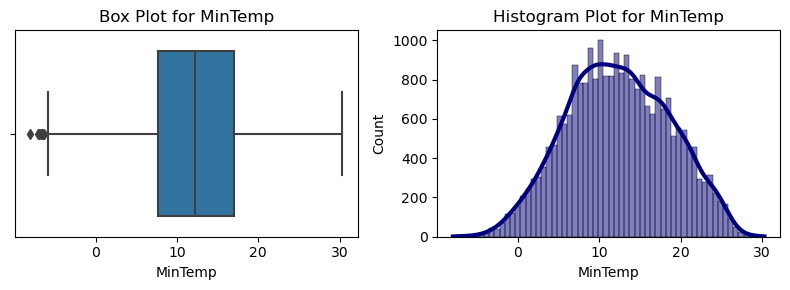

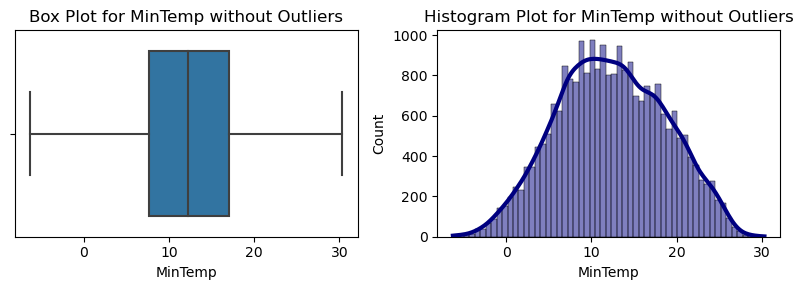

In [67]:
outlier_treatment(x_train, 'MinTemp')

Q1                                                =  0.0
Q2                                                =  0.0
Q3                                                =  0.8
IQR                                               =  0.8
Upper Limit Value                                 =  2.0
Total number of outliers(>Q3+1.5*IQR) for Rainfall      = 4537
Percentage of Outliers                            = 18.68%
Do you want to remove all outliers for RAINFALL column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


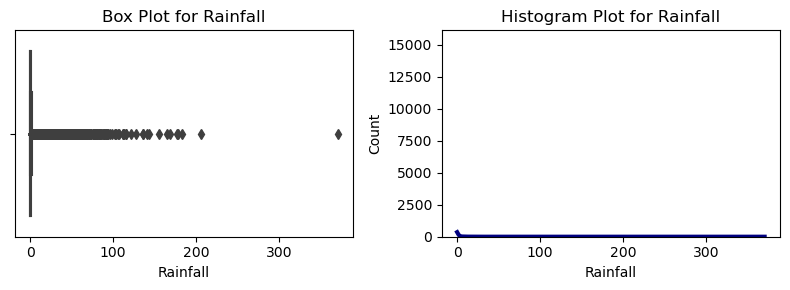

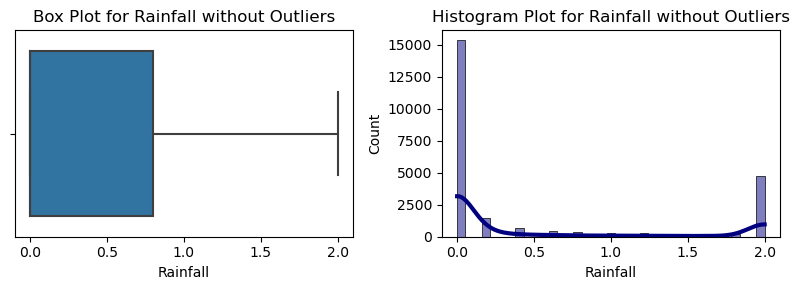

In [68]:
outlier_treatment(x_train, 'Rainfall')

Q1                                                =  6.9
Q2                                                =  8.4
Q3                                                =  9.6
IQR                                               =  2.7
Lower Limit Value                                 =  2.85
Total number of outliers(<Q1-1.5*IQR) for Sunshine      = 2543
Upper Limit Value                                 =  13.65
Total number of outliers(>Q3+1.5*IQR) for Sunshine      = 52
Percentage of Outliers                            = 10.69%
Do you want to remove all outliers for SUNSHINE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


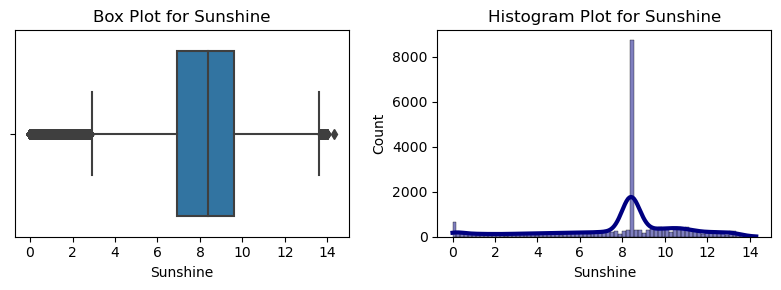

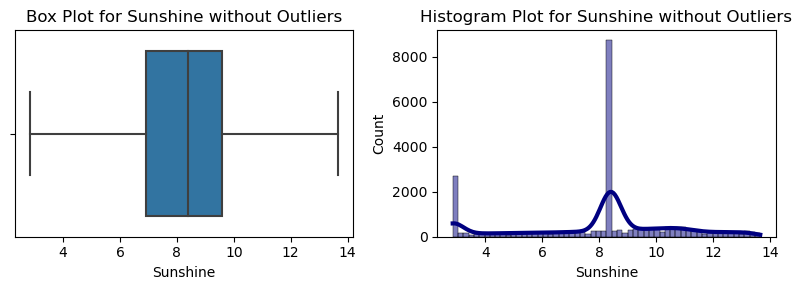

In [69]:
outlier_treatment(x_train, 'Sunshine')

Q1                                                =  31.0
Q2                                                =  39.0
Q3                                                =  46.0
IQR                                               =  15.0
Lower Limit Value                                 =  8.5
Total number of outliers(<Q1-1.5*IQR) for WindGustSpeed      = 3
Upper Limit Value                                 =  68.5
Total number of outliers(>Q3+1.5*IQR) for WindGustSpeed      = 933
Percentage of Outliers                            = 3.85%
Do you want to remove all outliers for WINDGUSTSPEED column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


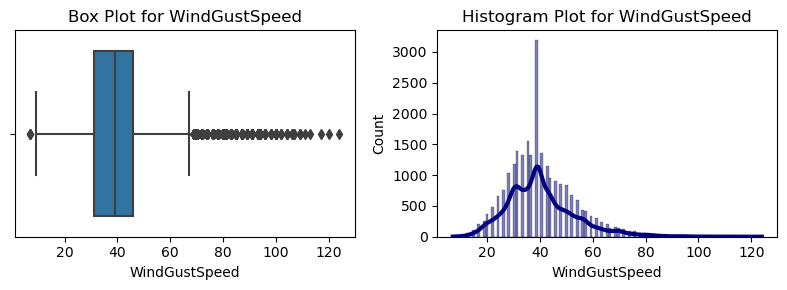

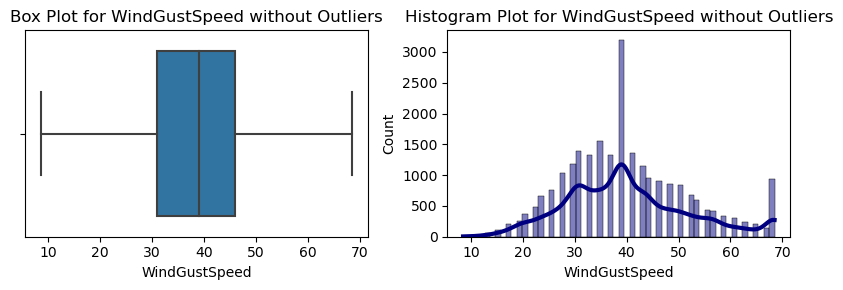

In [70]:
outlier_treatment(x_train, 'WindGustSpeed')

Q1                                                =  7.0
Q2                                                =  13.0
Q3                                                =  20.0
IQR                                               =  13.0
Upper Limit Value                                 =  39.5
Total number of outliers(>Q3+1.5*IQR) for WindSpeed9am      = 257
Percentage of Outliers                            = 1.06%
Do you want to remove all outliers for WINDSPEED9AM column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


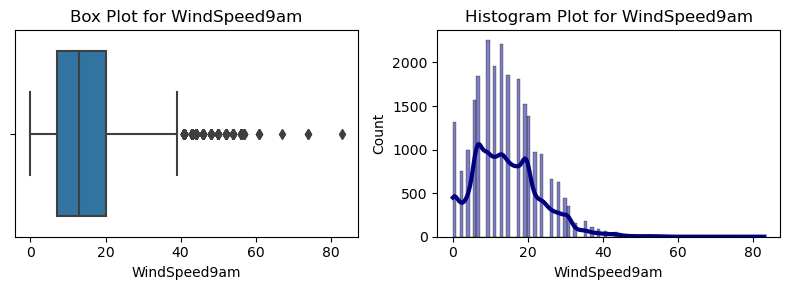

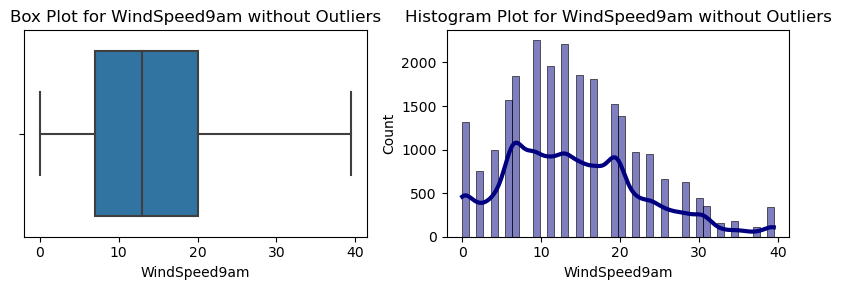

In [71]:
outlier_treatment(x_train, 'WindSpeed9am')

Q1                                                =  38.0
Q2                                                =  52.0
Q3                                                =  66.0
IQR                                               =  28.0


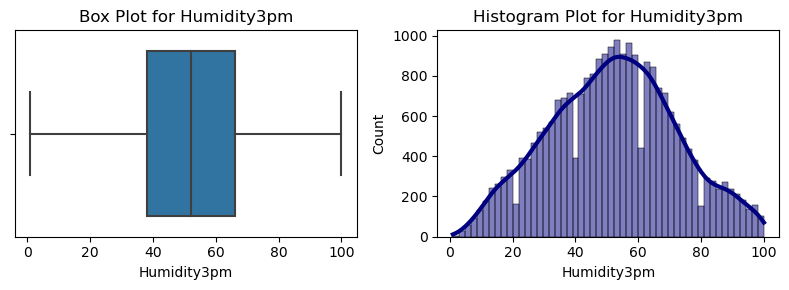

In [72]:
outlier_treatment(x_train, 'Humidity3pm')

Q1                                                =  1012.9
Q2                                                =  1017.2
Q3                                                =  1021.7
IQR                                               =  8.8
Lower Limit Value                                 =  999.7
Total number of outliers(<Q1-1.5*IQR) for Pressure9am      = 224
Upper Limit Value                                 =  1034.9
Total number of outliers(>Q3+1.5*IQR) for Pressure9am      = 157
Percentage of Outliers                            = 1.57%
Do you want to remove all outliers for PRESSURE9AM column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


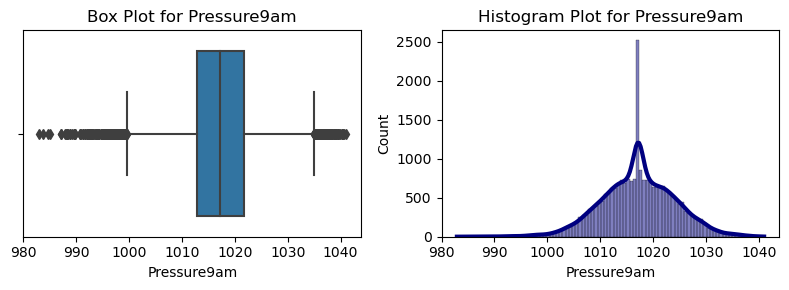

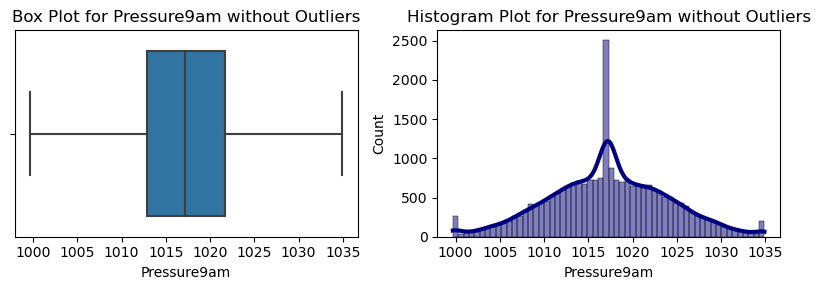

In [73]:
outlier_treatment(x_train, 'Pressure9am')

Q1                                                =  12.3
Q2                                                =  16.7
Q3                                                =  21.6
IQR                                               =  9.3
Lower Limit Value                                 =  -1.65
Total number of outliers(<Q1-1.5*IQR) for Temp9am      = 18
Upper Limit Value                                 =  35.55
Total number of outliers(>Q3+1.5*IQR) for Temp9am      = 10
Percentage of Outliers                            = 0.12%
Do you want to remove all outliers for TEMP9AM column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


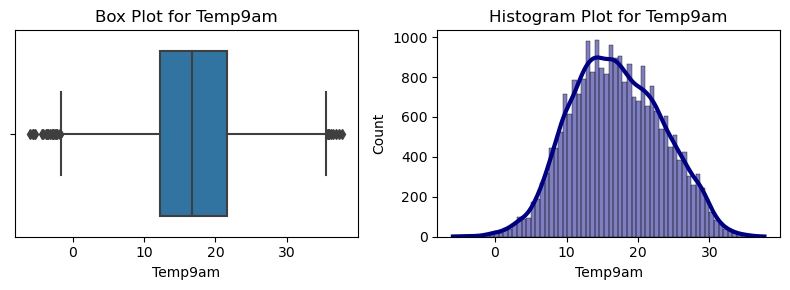

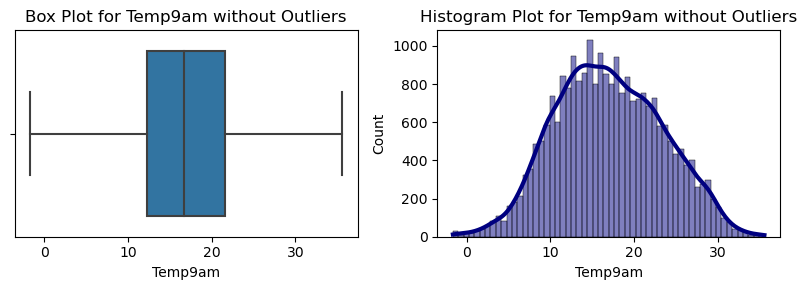

In [74]:
outlier_treatment(x_train, 'Temp9am')

In [75]:
print('Now Train Data contains {} rows & {} columns' .format(x_train.shape[0], x_train.shape[1]))

Now Train Data contains 24286 rows & 11 columns


In [76]:
# Since we have removed the outliers from X_train; so we have to reflect that change in y_train also:
y_train = y_train[x_train.index]
print('Shape of y_train = ', y_train.shape)

Shape of y_train =  (24286,)


### Outlier Treatment for Train_target:

Q1                                                =  0.0
Q2                                                =  0.0
Q3                                                =  0.8
IQR                                               =  0.8
Upper Limit Value                                 =  2.0
Total number of outliers(>Q3+1.5*IQR) for train_values      = 4480
Percentage of Outliers                            = 18.45%
Do you want to remove all outliers for TRAIN_VALUES column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


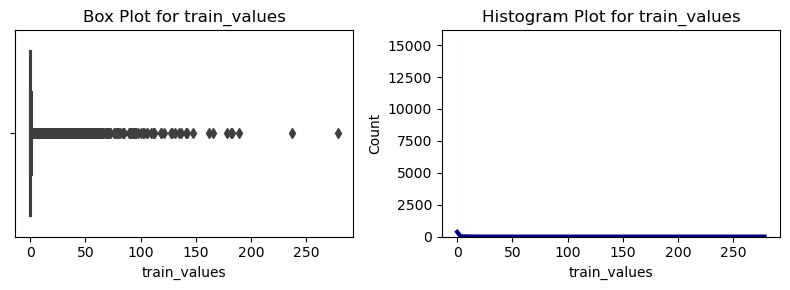

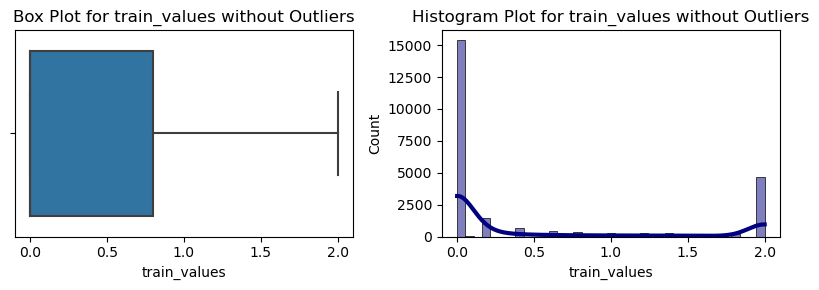

In [77]:
y_train_df = pd.DataFrame(data=y_train.values, index=y_train.index)
y_train_df.rename(mapper={0:'train_values'}, axis=1, inplace=True)
outlier_treatment(y_train_df, 'train_values')
y_train = y_train_df['train_values']

In [78]:
x_train = x_train.loc[y_train.index]

In [79]:
print('Finally x_train contains {} rows & {} columns' .format(x_train.shape[0], x_train.shape[1]))
print('Shape of y_train = ', y_train.shape)

Finally x_train contains 24286 rows & 11 columns
Shape of y_train =  (24286,)


### Normalization of X_train:
(we will be doing min-max normalization)

In [80]:
min_max = MinMaxScaler()
num_input_cols_final = numeric_cols_final[:-1]
x_train[num_input_cols_final] = min_max.fit_transform(x_train[num_input_cols_final])
display(x_train.head())
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)

,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,Cloud9am,Temp9am,RainToday
5050,0.485636,0.0,0.023148,SE,0.291667,0.151899,0.606061,0.639205,Cloudy,0.388441,No
29113,0.422709,0.0,0.513889,SW,0.541667,0.481013,0.313131,0.482955,Cloudy,0.393817,No
30075,0.622435,1.0,0.000000,WSW,0.258333,0.379747,0.666667,0.525568,Cloudy,0.525538,Yes
28747,0.406293,0.1,0.226852,WSW,0.975000,0.329114,0.515152,0.630682,Cloudy,0.307796,No
33141,0.753762,0.0,0.680556,E,0.575000,0.658228,0.282828,0.377841,Cloudy,0.724462,No


Shape of X_train =  (24286, 11)
Shape of y_train =  (24286,)


## Pre-processing on Test Dataset:

### Handling Missing Values:

In [81]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10409 entries, 10180 to 17640
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        10409 non-null  float64
 1   Rainfall       10409 non-null  float64
 2   Sunshine       6801 non-null   float64
 3   WindGustDir    9698 non-null   object 
 4   WindGustSpeed  9698 non-null   float64
 5   WindSpeed9am   10409 non-null  float64
 6   Humidity3pm    10409 non-null  float64
 7   Pressure9am    9640 non-null   float64
 8   Cloud9am       7071 non-null   object 
 9   Temp9am        10409 non-null  float64
 10  RainToday      10409 non-null  object 
dtypes: float64(8), object(3)
memory usage: 975.8+ KB


### Imputing Numeric Columns of X_test by Median Values of Train Data:

In [82]:
x_test[rem_cols_numeric] = x_test[rem_cols_numeric].fillna(x_train[rem_cols_numeric].median())

### Imputing Non-Numeric Columns of X_test by Mode Values of Train Data:

In [83]:
x_test[rem_cols_category] = x_test[rem_cols_category].fillna(x_train_mode)

### Finally we have handled all NaN values in X_test:

In [84]:
x_test.isna().sum(axis=0)

MinTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindSpeed9am     0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Temp9am          0
RainToday        0
dtype: int64

### Checking Null values in Y_test:

In [85]:
y_test.isna().sum(axis=0)

0

### Outlier Treatment for Test Dataset:

Q1                                                =  7.8
Q2                                                =  12.3
Q3                                                =  17.1
IQR                                               =  9.3
Lower Limit Value                                 =  -6.15
Total number of outliers(<Q1-1.5*IQR) for MinTemp      = 2
Percentage of Outliers                            = 0.02%
Do you want to remove all outliers for MINTEMP column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


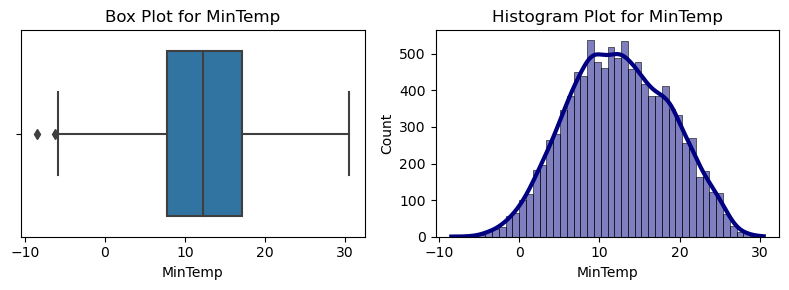

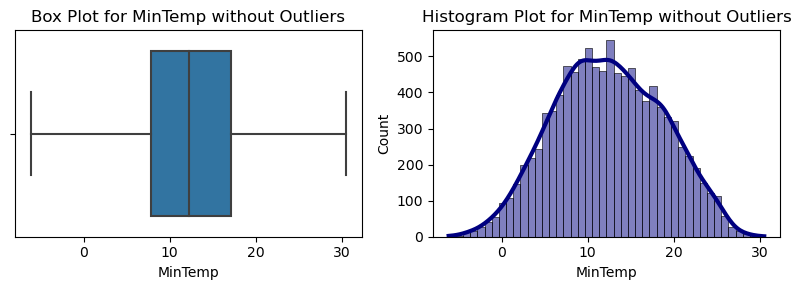

In [86]:
outlier_treatment(x_test, 'MinTemp')

Q1                                                =  0.0
Q2                                                =  0.0
Q3                                                =  0.8
IQR                                               =  0.8
Upper Limit Value                                 =  2.0
Total number of outliers(>Q3+1.5*IQR) for Rainfall      = 1987
Percentage of Outliers                            = 19.09%
Do you want to remove all outliers for RAINFALL column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


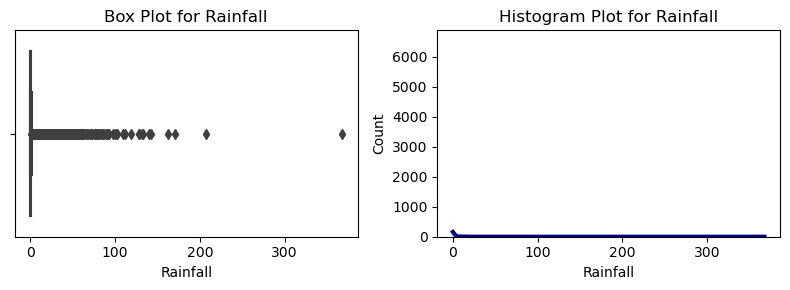

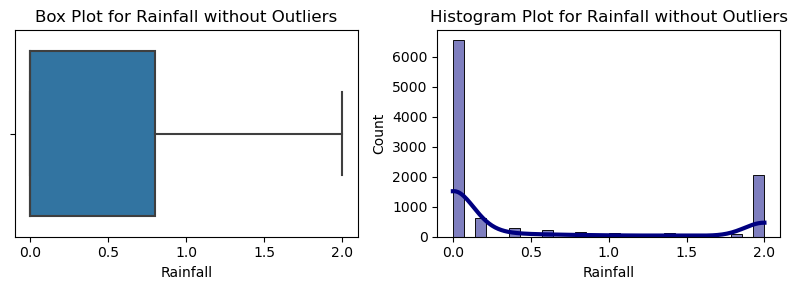

In [87]:
outlier_treatment(x_test, 'Rainfall')

Q1                                                =  0.51
Q2                                                =  4.5
Q3                                                =  9.6
IQR                                               =  9.09


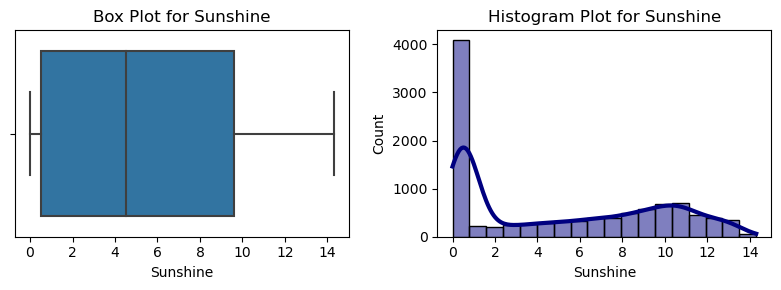

In [88]:
outlier_treatment(x_test, 'Sunshine')

Q1                                                =  30.0
Q2                                                =  37.0
Q3                                                =  46.0
IQR                                               =  16.0
Lower Limit Value                                 =  6.0
Total number of outliers(<Q1-1.5*IQR) for WindGustSpeed      = 711
Upper Limit Value                                 =  70.0
Total number of outliers(>Q3+1.5*IQR) for WindGustSpeed      = 285
Percentage of Outliers                            = 9.57%
Do you want to remove all outliers for WINDGUSTSPEED column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


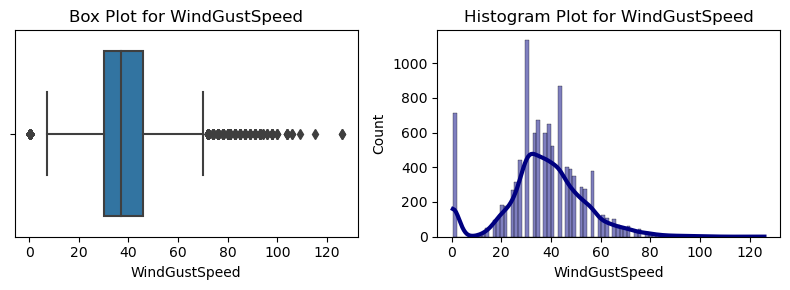

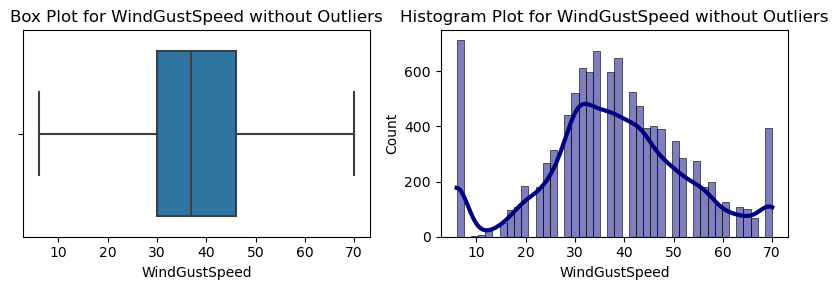

In [89]:
outlier_treatment(x_test, 'WindGustSpeed')

Q1                                                =  7.0
Q2                                                =  13.0
Q3                                                =  20.0
IQR                                               =  13.0
Upper Limit Value                                 =  39.5
Total number of outliers(>Q3+1.5*IQR) for WindSpeed9am      = 106
Percentage of Outliers                            = 1.02%
Do you want to remove all outliers for WINDSPEED9AM column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


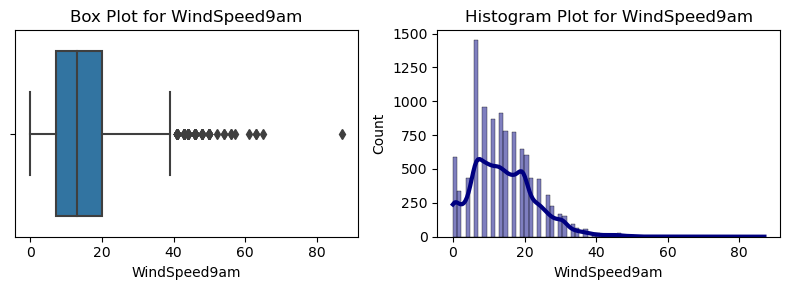

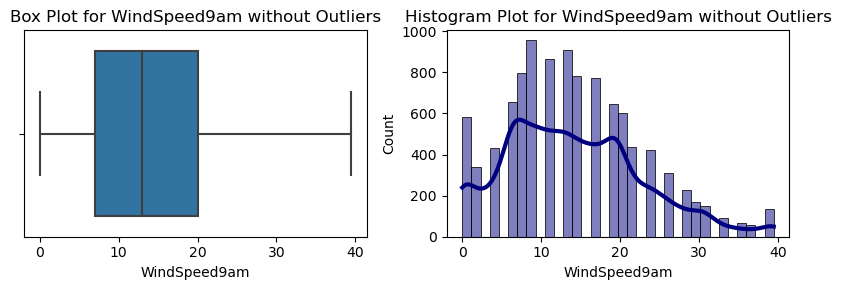

In [90]:
outlier_treatment(x_test, 'WindSpeed9am')

Q1                                                =  38.0
Q2                                                =  52.0
Q3                                                =  66.0
IQR                                               =  28.0


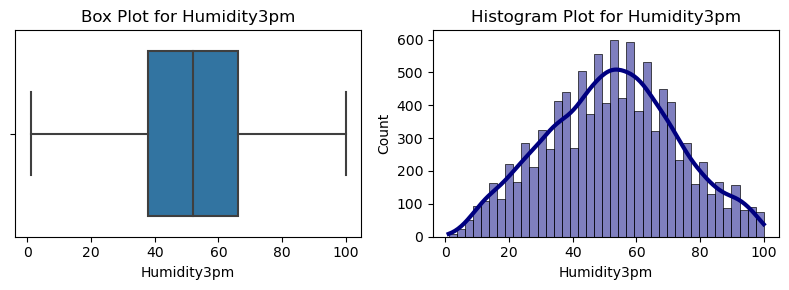

In [91]:
outlier_treatment(x_test, 'Humidity3pm')

Q1                                                =  1011.2
Q2                                                =  1016.7
Q3                                                =  1021.9
IQR                                               =  10.7
Lower Limit Value                                 =  995.15
Total number of outliers(<Q1-1.5*IQR) for Pressure9am      = 806
Upper Limit Value                                 =  1037.95
Total number of outliers(>Q3+1.5*IQR) for Pressure9am      = 9
Percentage of Outliers                            = 7.83%
Do you want to remove all outliers for PRESSURE9AM column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


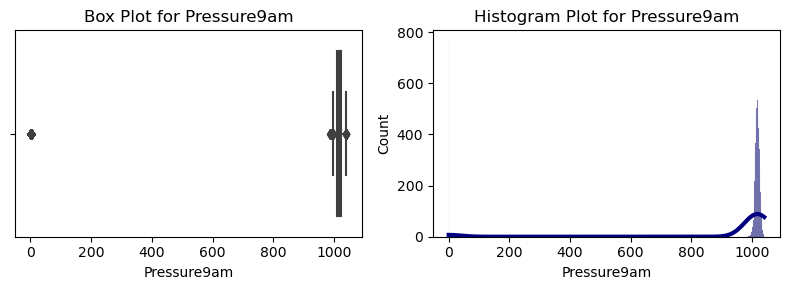

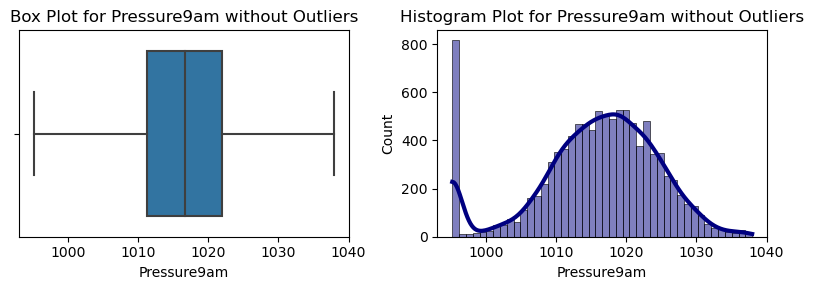

In [92]:
outlier_treatment(x_test, 'Pressure9am')

Q1                                                =  12.5
Q2                                                =  16.7
Q3                                                =  21.6
IQR                                               =  9.1
Lower Limit Value                                 =  -1.15
Total number of outliers(<Q1-1.5*IQR) for Temp9am      = 11
Upper Limit Value                                 =  35.25
Total number of outliers(>Q3+1.5*IQR) for Temp9am      = 8
Percentage of Outliers                            = 0.18%
Do you want to remove all outliers for TEMP9AM column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


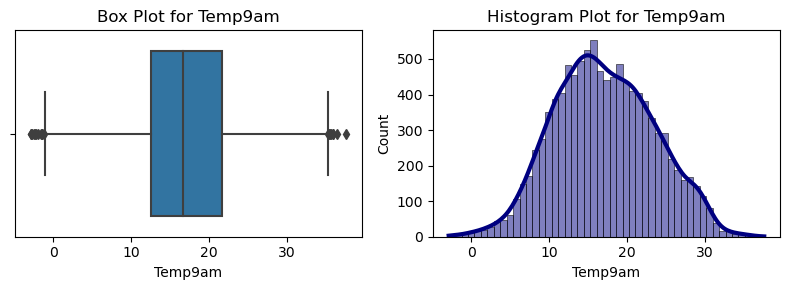

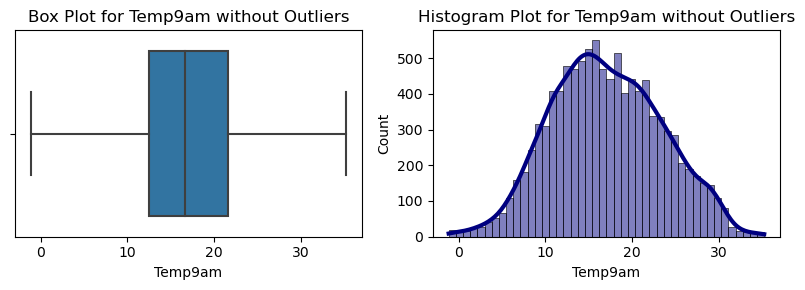

In [93]:
outlier_treatment(x_test, 'Temp9am')

In [94]:
print('Now Train Data contains {} rows & {} columns' .format(x_test.shape[0], x_test.shape[1]))

Now Train Data contains 10409 rows & 11 columns


In [95]:
y_test = y_test[x_test.index]
print('Shape of y_test = ', y_test.shape)

Shape of y_test =  (10409,)


### Checking outliers in Test_target:

Q1                                                =  0.0
Q2                                                =  0.0
Q3                                                =  0.8
IQR                                               =  0.8
Upper Limit Value                                 =  2.0
Total number of outliers(>Q3+1.5*IQR) for test_values      = 1966
Percentage of Outliers                            = 18.89%
Do you want to remove all outliers for TEST_VALUES column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


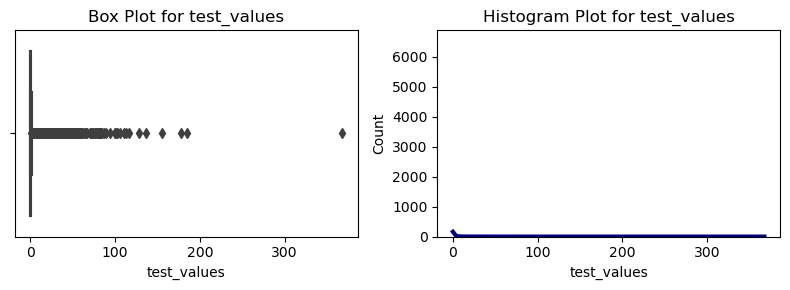

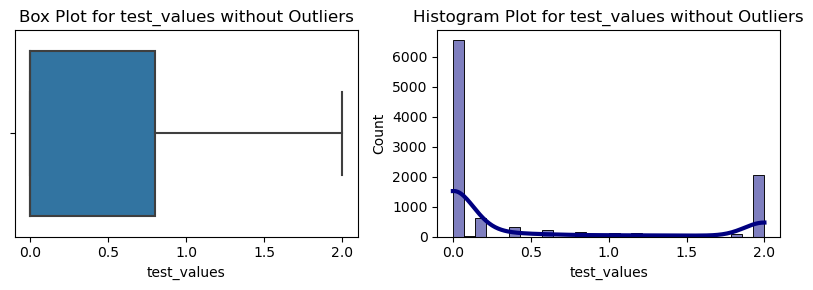

In [96]:
y_test_df = pd.DataFrame(data=y_test.values, index=y_test.index)
y_test_df.rename(mapper={0:'test_values'}, axis=1, inplace=True)
outlier_treatment(y_test_df, 'test_values')
y_test = y_test_df['test_values']

In [97]:
x_test = x_test.loc[y_test.index]

In [98]:
print('Finally x_test contains {} rows & {} columns' .format(x_test.shape[0], x_test.shape[1]))
print('Shape of y_test = ', y_test.shape)

Finally x_test contains 10409 rows & 11 columns
Shape of y_test =  (10409,)


### Normalization on X_test:
(we will be doing min-max normalization)

In [99]:
x_test[num_input_cols_final] = min_max.transform(x_test[num_input_cols_final])
display(x_test.head())

,MinTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,Cloud9am,Temp9am,RainToday
10180,0.458276,0.0,0.856481,WSW,0.758333,0.506329,0.575758,0.457386,Mostly Clear,0.493280,No
27386,0.285910,0.0,-0.216307,WSW,0.575000,0.101266,0.303030,-0.129261,Cloudy,0.393817,No
17728,0.258550,0.1,0.689815,S,0.175000,0.000000,0.444444,0.644886,Sunny,0.286290,No
12673,0.677155,1.0,-0.216307,ENE,0.358333,0.177215,0.727273,0.321023,Cloudy,0.630376,Yes
33284,0.357045,0.0,-0.216307,NE,0.375000,0.278481,0.515152,0.630682,Partly Cloudy,0.361559,No


## Performing One Hot Encoding on Train & Test Dataset:

In [100]:
print('Before one hot encoding size of train dataset: ')
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('\nBefore one hot encoding size of test dataset:')
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Before one hot encoding size of train dataset: 
Shape of X_train =  (24286, 11)
Shape of y_train =  (24286,)

Before one hot encoding size of test dataset:
Shape of X_test =  (10409, 11)
Shape of y_test =  (10409,)


In [101]:
x_train['ind'] = 10
x_test['ind'] = 20
merge_df = pd.concat([x_train, x_test])
merge_df1 = pd.get_dummies(merge_df, drop_first=True)
x_train = merge_df1[merge_df1['ind'] == 10].copy()
x_train.drop(['ind'], axis=1, inplace=True)
x_test = merge_df1[merge_df1['ind'] == 20].copy()
x_test.drop(['ind'], axis=1, inplace=True)

In [102]:
print('After one hot encoding size of train dataset: ')
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('\nAfter one hot encoding size of test dataset:')
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

After one hot encoding size of train dataset: 
Shape of X_train =  (24286, 33)
Shape of y_train =  (24286,)

After one hot encoding size of test dataset:
Shape of X_test =  (10409, 33)
Shape of y_test =  (10409,)


# Model Implementation:

# 1. Linear Regression Model:

In [103]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred_mlr = mlr.predict(x_test)
mlr_score = np.round(mlr.score(x_test, y_test),4)
mlr_score_tr = np.round(mlr.score(x_train, y_train),4)

no_of_rows_tr = x_train.shape[0]
tot_no_of_input_cols_tr = x_train.shape[1]
mlr_adj_r2_score_tr = \
1 - ((1-mlr_score_tr)*(no_of_rows_tr)/(no_of_rows_tr - tot_no_of_input_cols_tr - 1))

no_of_rows = x_test.shape[0]
tot_no_of_input_cols = x_test.shape[1]
mlr_adj_r2_score = 1 - ((1-mlr_score)*(no_of_rows)/(no_of_rows - tot_no_of_input_cols - 1))

mlr_rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred_mlr)),2)
mlr_intercept = mlr.intercept_
mlr_coef = mlr.coef_
mlr_train_r2 = mlr.score(x_train, y_train)
print('Intercept Value         = ', mlr_intercept, '\n')
print('beta Coefficients value = \n', mlr_coef, '\n')
print('\nTraining data R2-score:', np.round(mlr_train_r2,4))
print('Training data Adjusted R2-score:', np.round(mlr_adj_r2_score_tr,4))
print('\n\nTest Data Statistics:')
print('-'*21)
print('Model RMSE Value        = ', mlr_rmse)
print('Model R2 score          = ', mlr_score)
print('Adjusted R2-score       = ', np.round(mlr_adj_r2_score,4))

Intercept Value         =  -0.02237289514655061 

beta Coefficients value = 
 [-0.4520594   0.3113265  -0.58550275  0.78304488 -0.18808089  1.46265114
 -0.51636616  0.50576268 -0.00670441 -0.01316215  0.06011065 -0.00373816
  0.01876319  0.02450852  0.03588621 -0.09919157 -0.06854542 -0.05066266
 -0.08484579 -0.10212368 -0.03099045 -0.02717756 -0.07588824 -0.11990384
 -0.66558832 -0.12243128 -0.11065722 -0.17268669 -0.03964324 -0.11008398
 -0.10596065 -0.08849703 -0.01800039] 


Training data R2-score: 0.3746
Training data Adjusted R2-score: 0.3737


Test Data Statistics:
---------------------
Model RMSE Value        =  0.7
Model R2 score          =  0.2444
Adjusted R2-score       =  0.2419


### Analyzing Residuals:

In [104]:
res_df = pd.DataFrame()
res_df['y_test'] = y_test
res_df['y_predicted'] = y_pred_mlr
res_df['residuals'] = res_df['y_test'] - res_df['y_predicted']
res_avg = np.average(res_df['residuals'])
res_df

,y_test,y_predicted,residuals
10180,0.0,0.424681,-0.424681
27386,0.0,0.919591,-0.919591
17728,0.0,-0.100800,0.100800
12673,2.0,1.428941,0.571059
33284,0.0,0.681000,-0.681000
...,...,...,...
588,2.0,1.447679,0.552321
33090,0.0,-0.076780,0.076780
34008,2.0,1.855315,0.144685
9576,0.0,0.057440,-0.057440


### Residual Plot based on Linear Regression model:

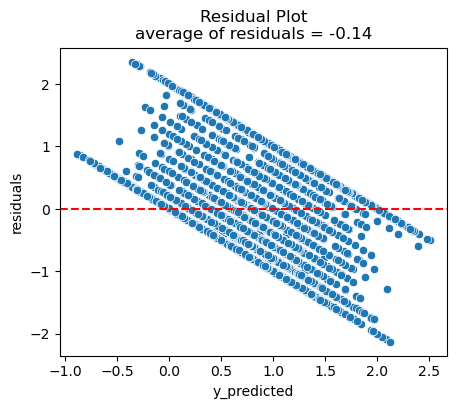

In [105]:
plt.figure(figsize=(5,4))
sns.scatterplot(data = res_df, x = 'y_predicted', y = 'residuals')
plt.axhline(y = 0, color = 'r', ls='--')
plt.title('Residual Plot\naverage of residuals = %s' %(np.round(res_avg,2)));

The above residual plot shows; homoscedasticity property has been validated successfully. <br>
Still we will perfrom statistical test to be sure about **homoscedasticity**.

### Goldfeld Quandt Test: 
H0: Error terms are homoscedastic <br>
Ha: Error terms are heteroscedastic

In [106]:
import statsmodels.stats.api as sm
from statsmodels.compat import lzip

print('p-value = ', sm.het_goldfeldquandt(res_df['residuals'], x_test)[1])
print("\nSince p-value is more than 0.05; we can't reject Null Hypothesis (H0)")
print("It means error terms are homoscedastic; which we infered from the above residual plot.")

p-value =  0.21335062209130276

Since p-value is more than 0.05; we can't reject Null Hypothesis (H0)
It means error terms are homoscedastic; which we infered from the above residual plot.


### Durbin-Watson Test to check presence of Autocorrelation:
H0: There is no correlation among the residuals <br>
Ha: The residuals are autocorrelated.

In [123]:
from statsmodels.stats.stattools import durbin_watson

print('Test Statistic = ', durbin_watson(res_df['residuals']))
print('\nSince test statistic is lying within range 1.5 to 2.5; so we would consider autocorrelation \
not to be     problematic in this regression model')

Test Statistic =  1.9322081020458102

Since test statistic is lying within range 1.5 to 2.5; so we would consider autocorrelation not to be     problematic in this regression model


### Plotting Distribution of Residuals and corresponding Q-Q plot:

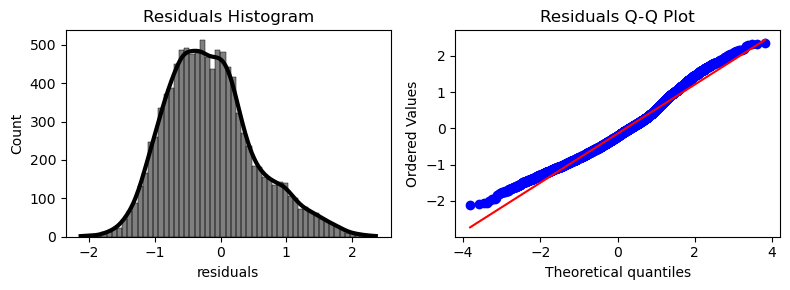

In [108]:
plt.figure(figsize=(8,3))
ax_1 = plt.subplot(1,2,1)
sns.histplot(data = res_df, x = 'residuals', kde = True, ax = ax_1, 
             color='black', line_kws = {'lw':3, 'ls':'-'})
ax_1.set_title('Residuals Histogram');

ax_2 = plt.subplot(1,2,2)
stats.probplot(res_df['residuals'], dist = 'norm', plot = plt)
ax_2.set_title('Residuals Q-Q Plot')
plt.tight_layout();

From above plot; we can see; residuals are almost following a normal distribution of mean 0. <br>
Which was another important assumption of Linear Regression Model; validated successfully.

# 2. Polynomial Regression Model:

In [109]:
deg = np.arange(1,3,1)
train_r2_score_poly = []
test_r2_score_poly = []
y_pred_poly_trans = []
rmse_poly = []
d = 0

for d in deg:
    poly = x_train_poly = x_test_poly = mlr1 = y_pred_poly = mlr1_score = ''
    
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    mlr1 = LinearRegression()
    mlr1.fit(x_train_poly, y_train)
    y_pred_poly = mlr1.predict(x_test_poly)
    y_pred_poly_trans.append(y_pred_poly)
    mlr1_train_score = mlr1.score(x_train_poly, y_train)
    mlr1_test_score = mlr1.score(x_test_poly, y_test)
    poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    rmse_poly.append(poly_rmse)
    train_r2_score_poly.append(mlr1_train_score)
    test_r2_score_poly.append(mlr1_test_score)

### Visualization of Best R2 score for different polynomial degrees:

,Polynomial_Degree,Train_R2_Score,Test_R2_Score
0,1,0.374600,0.244405
1,2,0.429485,0.164994


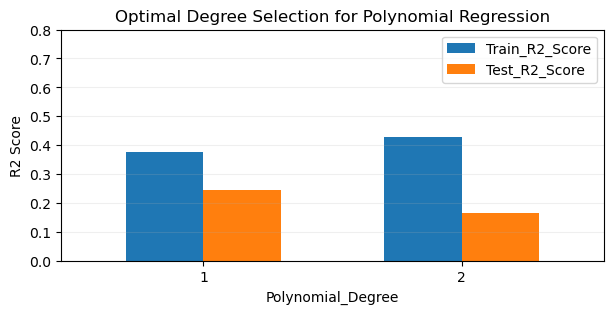

In [110]:
poly_df = pd.DataFrame()
poly_df['Polynomial_Degree'] = deg
poly_df['Train_R2_Score'] = train_r2_score_poly
poly_df['Test_R2_Score'] = test_r2_score_poly
display(poly_df)

poly_df.plot(kind = 'bar', x = 'Polynomial_Degree', width = 0.6, figsize = (7,3),
             title='Optimal Degree Selection for Polynomial Regression')
plt.xticks(rotation = 0)
plt.ylim(0,0.8)
plt.grid(axis = 'y', alpha = 0.2)
plt.ylabel('R2 Score')
plt.show()

We can see here; for degree more than 1; train accuracy is gradually increasing & test accuracy is gradually decreasing.<br>
so, Polynomial model is not performing well compared to Linear Regression; for degree >= 2

# 3. KNN Regression Model:

### Finding Optimal value of K :

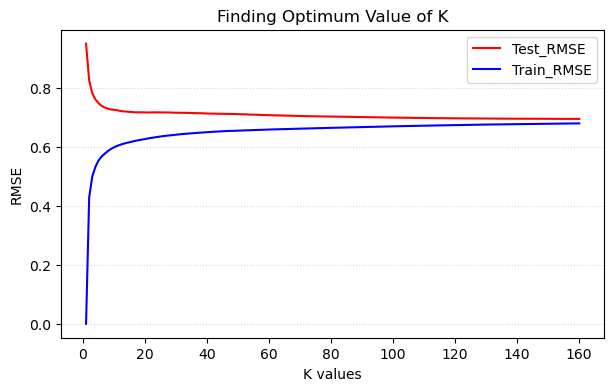

In [111]:
k = 0
no_of_iteration = 160
knn_train_rmse = []
knn_test_rmse = []

for k in np.arange(1,(no_of_iteration+1)): 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_rmse_knn = np.sqrt(mean_squared_error(y_train, knn.predict(x_train)))
    knn_train_rmse.append(train_rmse_knn)
    test_rmse_knn = np.sqrt(mean_squared_error(y_test, knn.predict(x_test)))
    knn_test_rmse.append(test_rmse_knn)

plt.figure(figsize=(7,4))
plt.plot(range(1,(no_of_iteration+1)), knn_test_rmse, 'r-', label = 'Test_RMSE')
plt.plot(range(1,(no_of_iteration+1)), knn_train_rmse, 'b-', label = 'Train_RMSE')
plt.title('Finding Optimum Value of K')
plt.xlabel('K values')
plt.ylabel('RMSE')
plt.grid(axis='y', alpha=0.5, ls = ':')
plt.legend();

We are getting k=150 as optimal value; where model is being generalized

### Fitting data to Optimized KNN model:

In [112]:
knn1 = KNeighborsRegressor(n_neighbors=150)
knn1.fit(x_train, y_train)
y_pred_knn1 = knn1.predict(x_test)
knn1_score = r2_score(y_test, y_pred_knn1)
knn1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn1))
knn1_score_train = r2_score(y_train, knn1.predict(x_train))
print('Model RMSE Value  = ', knn1_rmse)
print('Train R2 score    = ', knn1_score_train)
print('Test R2 score     = ', knn1_score)

Model RMSE Value  =  0.695314349330335
Train R2 score    =  0.28026421836334625
Test R2 score     =  0.25340460761941896


# 4. Decision Tree Model:

In [113]:
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(x_train, y_train)
y_pred_dt_test = dt.predict(x_test)
dt_train_accuracy = dt.score(x_train, y_train)
dt_test_accuracy = dt.score(x_test, y_test)
print('Train R2    = ', dt_train_accuracy)
print('Test R2     = ', dt_test_accuracy)
print('RMSE value  = ', np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

Train R2    =  1.0
Test R2     =  -0.33420143547823455
RMSE value  =  0.9294996727574782


Clearly we can see, our model is overfitting on training data.

### Finding Optimum Max_Depth value to reduce Overfitting through Cross Validation:

In [114]:
X = x.copy()
Y = y.copy()
num_cols = X.select_dtypes(include='number').columns
catg_cols = X.select_dtypes(exclude='number').columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
minmax = MinMaxScaler()
X[num_cols] = minmax.fit_transform(X[num_cols])
X = pd.get_dummies(X, drop_first=True)

In [115]:
avg_train_list = []
avg_test_list = []

for depth in range(1,16):
    dtr_1 = DecisionTreeRegressor(max_depth=depth, random_state=1234)
    dtr_cv1 = cross_validate(dtr_1, X, Y, scoring='r2', cv=10, return_train_score=True)
    dtr_avg_train_r2 = dtr_cv1['train_score'].mean()*100
    avg_train_list.append(dtr_avg_train_r2)
    dtr_avg_test_r2 = dtr_cv1['test_score'].mean()*100
    avg_test_list.append(dtr_avg_test_r2)
    dtr_1 = ''
    
temp_df1 = pd.DataFrame()
temp_df1['max depth'] = range(1,16)
temp_df1['avg train r2'] = avg_train_list
temp_df1['avg test r2'] = avg_test_list
temp_df1.set_index(['max depth'], inplace=True)
cond1 = temp_df1['avg train r2'] > 35
cond2 = temp_df1['avg test r2'] > 15
optimum_max_depth = temp_df1[cond1 & cond2].index[0]
print('Optimum max depth for decision tree model is = ', optimum_max_depth)

Optimum max depth for decision tree model is =  5


### Decision Tree with Optimized Hyperparameter:

In [116]:
optimum_max_depth = 5
dtr_2 = DecisionTreeRegressor(random_state=1234, max_depth=optimum_max_depth)
dtr_2.fit(x_train, y_train)
y_pred_dtr2_test = dtr_2.predict(x_test)
dtr2_train_accuracy = dtr_2.score(x_train, y_train)
dtr2_test_accuracy = dtr_2.score(x_test, y_test)
dtr2_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr2_test))

print('Train R2 Score = ', dtr2_train_accuracy)
print('Test R2 Score  = ', dtr2_test_accuracy)
print('RMSE value     = ', dtr2_rmse)

Train R2 Score =  0.3877082437901659
Test R2 Score  =  0.33721943805770094
RMSE value     =  0.655123865883388


# 5. Random Forest Model:

In [117]:
rfr_2 = RandomForestRegressor(random_state=1234)
rfr_2.fit(x_train, y_train)
y_pred_rfr2_test = rfr_2.predict(x_test)
rfr2_train_accuracy = rfr_2.score(x_train, y_train)
rfr2_test_accuracy = rfr_2.score(x_test, y_test)
rfr2_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr2_test))

print('Train R2 Score = ', rfr2_train_accuracy)
print('Test R2 Score  = ', rfr2_test_accuracy)
print('RMSE value     = ', rfr2_rmse)

Train R2 Score =  0.9177132774728474
Test R2 Score  =  0.2948349333526936
RMSE value     =  0.6757467010622704


here also we can see; Training R2 is too high compared Test score. Model is showing overfitting tendency.

### Performing Cross Validation on Random Forest Regressor:

In [118]:
rfr_1 = RandomForestRegressor(random_state=1234)
rfr_cv = cross_validate(rfr_1, X, Y, scoring='r2', cv=10, return_train_score=True)
print('Minimum training score = ', rfr_cv['train_score'].min())
print('Maximum training score = ', rfr_cv['train_score'].max())
print('Average training score = {} %' .format(rfr_cv['train_score'].mean()*100))
print('\nMinimum test score     = ', rfr_cv['test_score'].min())
print('Maximum test score     = ', rfr_cv['test_score'].max())
print('Average test score     = {} %' .format(rfr_cv['test_score'].mean()*100))

Minimum training score =  0.9026075045120947
Maximum training score =  0.9067055365063783
Average training score = 90.5240258913141 %

Minimum test score     =  0.2047186845479788
Maximum test score     =  0.4109772910698489
Average test score     = 30.64855382372011 %


Since, there is a huge difference between average train & test r2 score; so we have to do hyper-parameter tuning for Random Forest Model.

### Hyperparameter Tuning for Random Forest (GridSearchCV):

In [119]:
rfr_params = {'n_estimators':[10,20,24,35,50], 
              'max_depth': [2,5],
              'min_samples_split':[4,10,20], 
              'min_samples_leaf':[7,8]}

rfr_3 = RandomForestRegressor(random_state=1234)

rfr_grid_cv = RandomizedSearchCV(estimator=rfr_3, 
                                 param_distributions=rfr_params,
                                 n_iter=10,
                                 scoring='r2', 
                                 cv=10, 
                                 random_state=1234,
                                 return_train_score=True)

rfr_grid_cv.fit(x_train, y_train)
print('Optimum Parameters: \n', rfr_grid_cv.best_params_)

Optimum Parameters: 
 {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_depth': 5}


### Random Forest model with Optimized Hyperparameter:

In [120]:
rfr_4 = RandomForestRegressor(n_estimators=50, 
                              min_samples_split=10,
                              min_samples_leaf=7,
                              max_depth=5,
                              random_state=1234)
rfr_4.fit(x_train, y_train)
y_pred_rfr4_test = rfr_4.predict(x_test)
rfr4_train_accuracy = rfr_4.score(x_train, y_train)
rfr4_test_accuracy = rfr_4.score(x_test, y_test)
rfr4_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr4_test))

print('Train R2 Score = ', rfr4_train_accuracy)
print('Test R2 Score  = ', rfr4_test_accuracy)
print('RMSE value     = ', rfr4_rmse)

Train R2 Score =  0.41230693334250945
Test R2 Score  =  0.3533089297892692
RMSE value     =  0.6471232021873736


## Summary of Applied Machine Learning Models :

In [121]:
summary_df = pd.DataFrame()
poly_train_r2 = poly_df[poly_df['Polynomial_Degree']==2]['Train_R2_Score'].values[0]
poly_test_r2 = poly_df[poly_df['Polynomial_Degree']==2]['Test_R2_Score'].values[0]

summary_df['Regression Models'] = ['Linear Regression', 'Polynomial (degree 2)', 'KNN', 
                                   'Decision Tree', 'Random Forest']

l1 = np.round(np.array([mlr_train_r2, poly_train_r2, knn1_score_train, dtr2_train_accuracy, 
                        rfr4_train_accuracy]),2)
summary_df['Train_R2'] = l1

l2 = np.round(np.array([mlr_score, poly_test_r2, knn1_score, dtr2_test_accuracy, 
                        rfr4_test_accuracy]),2)
summary_df['Test_R2'] = l2

l3 = np.round(np.array([mlr_rmse, rmse_poly[1], knn1_rmse, dtr2_rmse, rfr4_rmse]),2)
summary_df['RMSE'] = l3

summary_df.set_index('Regression Models', inplace=True)
summary_df

,Train_R2,Test_R2,RMSE
Regression Models,,,
Linear Regression,0.37,0.24,0.70
Polynomial (degree 2),0.43,0.16,0.74
KNN,0.28,0.25,0.70
Decision Tree,0.39,0.34,0.66
Random Forest,0.41,0.35,0.65


Among 5 models, Random Forest will be considered as best based on least RMSE.